# Training Data #
This data is collected from the www.sports-reference.com. The website contains the boxscores between 2 teams that have a game during each day. We will collect the boxscores (winning team, losing team, winning score, losing score) for each day from November 2018 to April 2019. We will be using this data to train our linear regression model.

1. We will perform a get request for the website each day.
2. We will then use BeautifulSoup to parse the HTML script
3. Finally, we will store the data into a pandas dataframe with 5 columns: the date of the match, the winning team, the losing team, the winning score, and the losing score.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

df = pd.DataFrame(columns=["date", "win_team", "lose_team", "win_score", "lose_score"])

#The format of the URL. we will continue to increment the month, day, and year
url_format = "https://www.sports-reference.com/cbb/boxscores/index.cgi?month={}&day={}&year={}"
for y in [2018, 2019]:
    months = []
    if y == 2018:
        months = [11, 12]
    else:
        months = [1, 2, 3, 4]
    
    for m in months:
        days = range(1,32)
        for d in days:
            url = url_format.format(str(m),str(d),str(y))
            r = requests.get(url)

            root = BeautifulSoup(r.content)
            root.prettify()
            
            #Retrieve the specific place that contains all the information
            t = root.find("div", class_="game_summaries")
            date = str(m) + "/" + str(d) + "/" + str(y)
    
            #game_summary nohover contains all the table for each match
            #we will iterate through all the tables in the website and parse them one by one
            for i in root.find_all("div", class_="game_summary nohover"):
                loser = i.find("tr", class_="loser")
                lose_team = loser.find("a").getText()
                lose_score = loser.find("td", class_="right").getText()
    
                winner = i.find("tr", class_="winner")
                win_team = winner.find("a").getText()
                win_score = winner.find("td", class_="right").getText()
                
                df = df.append({"date":date, "win_team":win_team, "lose_team":lose_team, "win_score":win_score, "lose_score":lose_score}, ignore_index=True)
            
            time.sleep(0.5)

print(df)

           date       win_team       lose_team win_score lose_score
0     11/6/2018         Kansas  Michigan State        92         87
1     11/6/2018           Duke        Kentucky       118         84
2     11/6/2018        Gonzaga     Idaho State       120         79
3     11/6/2018       Virginia          Towson        73         42
4     11/6/2018      Tennessee    Lenoir-Rhyne        86         41
...         ...            ...             ...       ...        ...
6044   4/4/2019          Texas        Lipscomb        81         66
6045   4/5/2019  South Florida          DePaul        77         65
6046   4/6/2019       Virginia          Auburn        63         62
6047   4/6/2019     Texas Tech  Michigan State        61         51
6048   4/8/2019       Virginia      Texas Tech        85         77

[6049 rows x 5 columns]


Abilene Christian


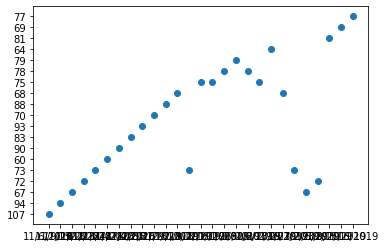

Air Force


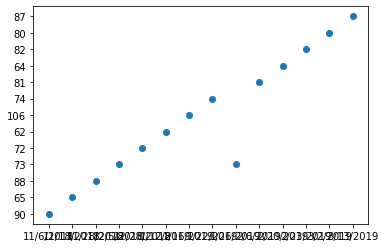

Akron


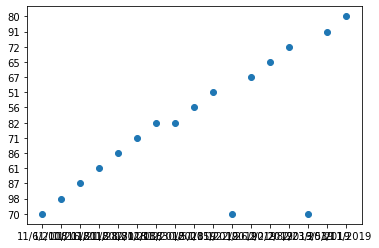

Alabama


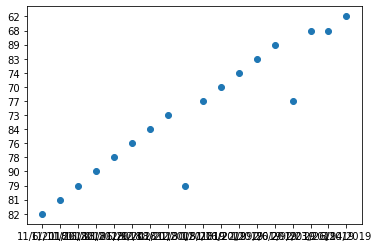

Alabama A&M


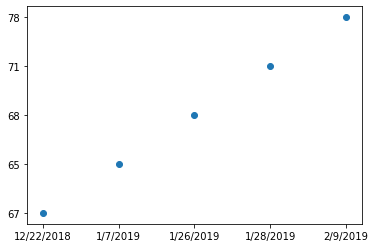

Alabama State


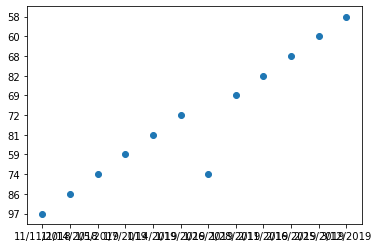

Alabama-Birmingham


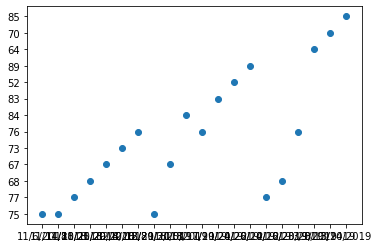

Albany (NY)


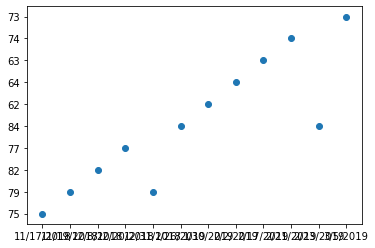

Alcorn State


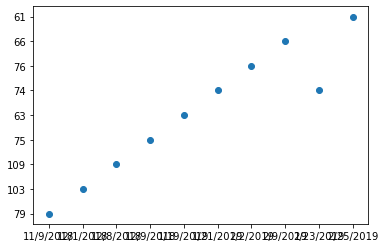

American


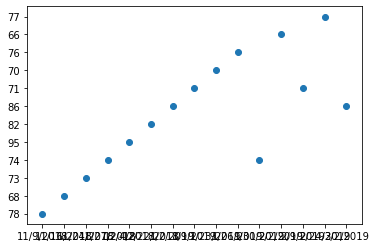

Appalachian State


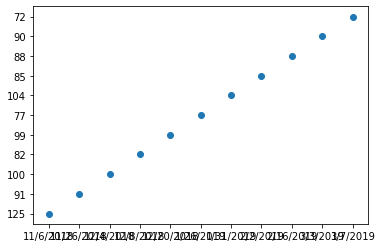

Arizona


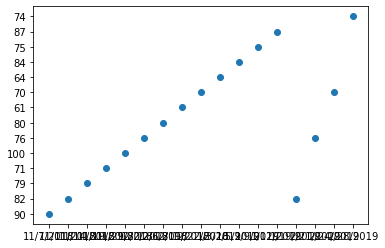

Arizona State


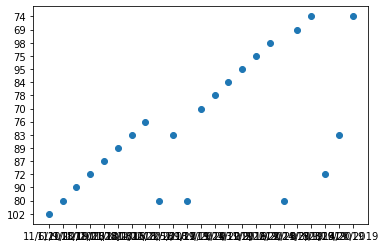

Arkansas


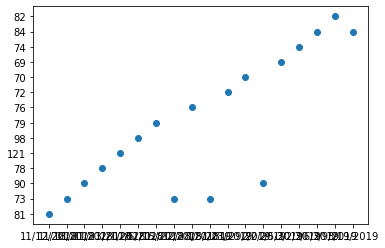

Arkansas State


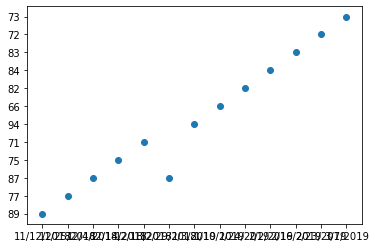

Arkansas-Pine Bluff


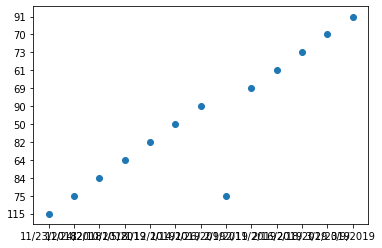

Army


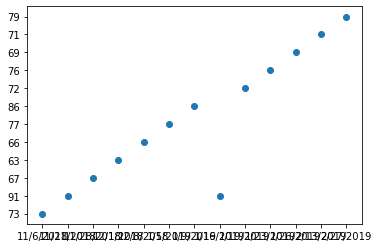

Auburn


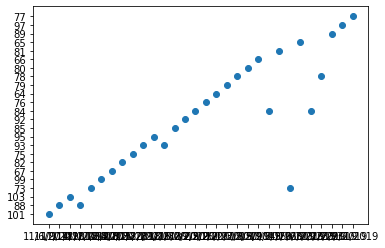

Austin Peay


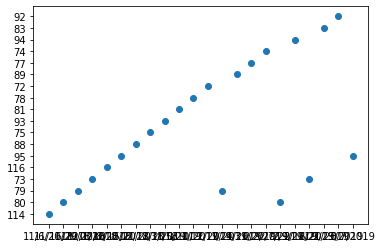

BYU


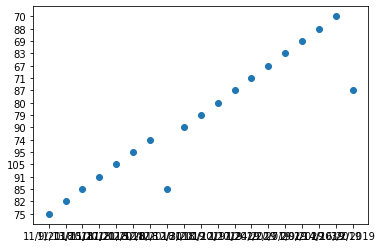

Ball State


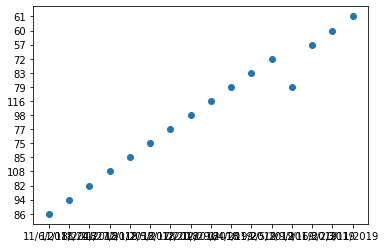

Baylor


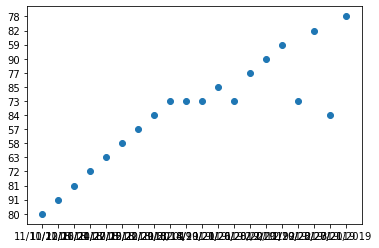

Belmont


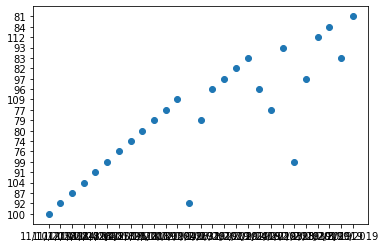

Bethune-Cookman


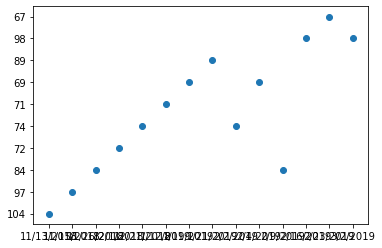

Binghamton


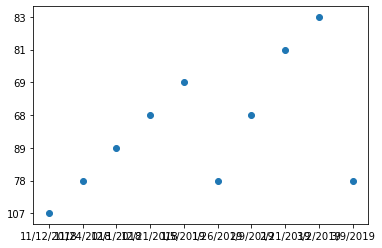

Boise State


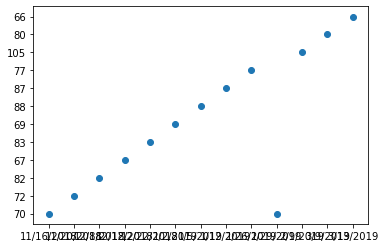

Boston College


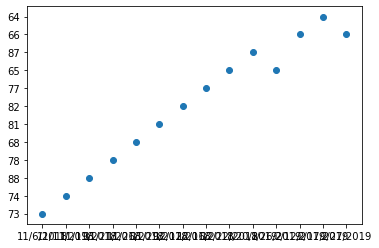

Boston University


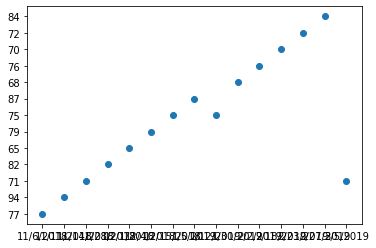

Bowling Green State


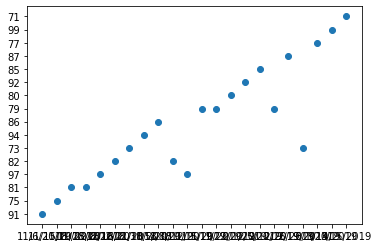

Bradley


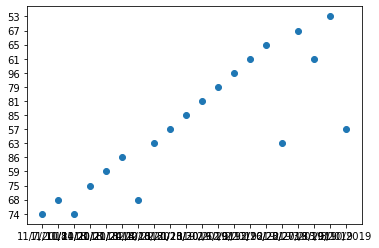

Brown


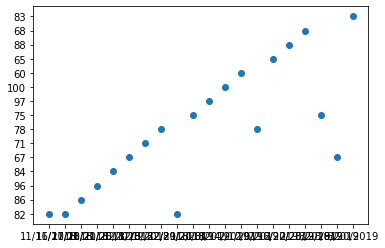

Bryant


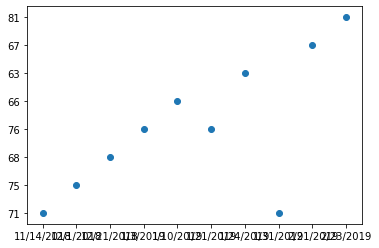

Bucknell


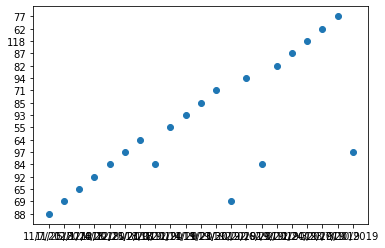

Buffalo


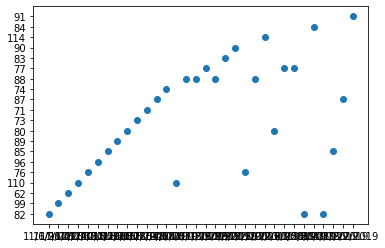

Butler


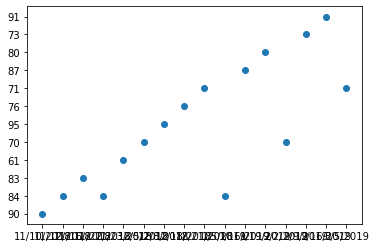

Cal Poly


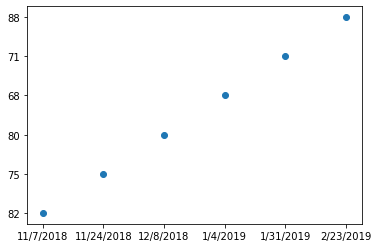

Cal State Bakersfield


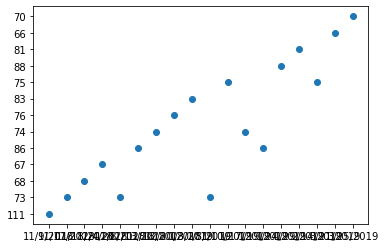

Cal State Fullerton


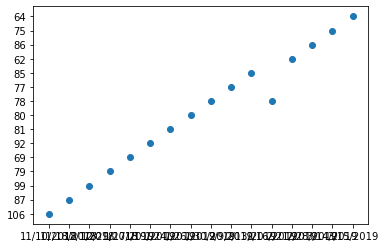

Cal State Northridge


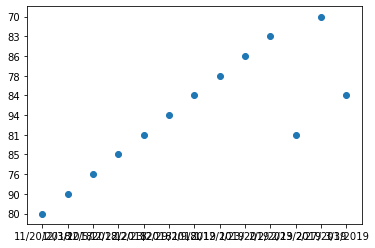

California


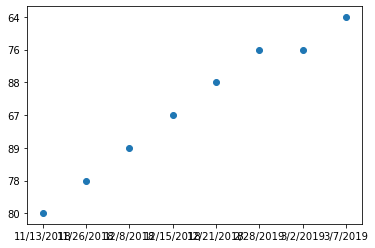

California Baptist


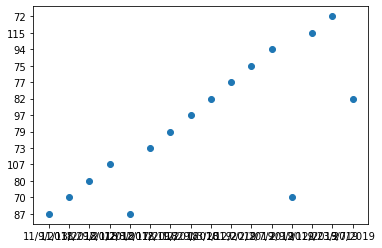

Campbell


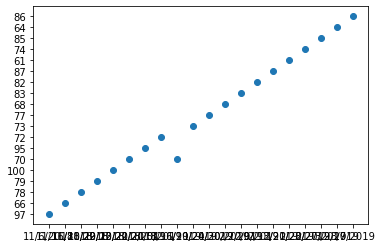

Canisius


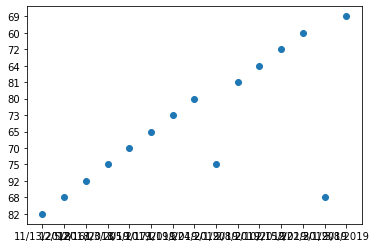

Central Arkansas


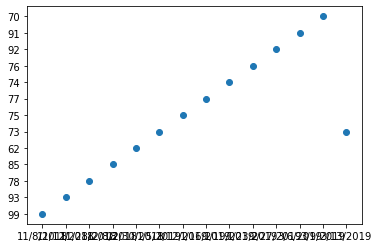

Central Connecticut


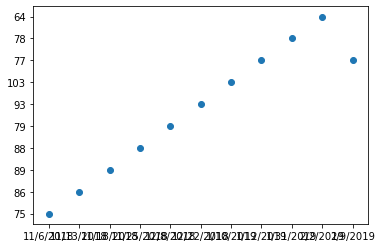

Central Michigan


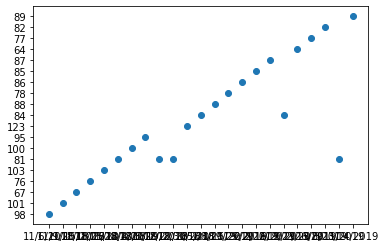

Charleston Southern


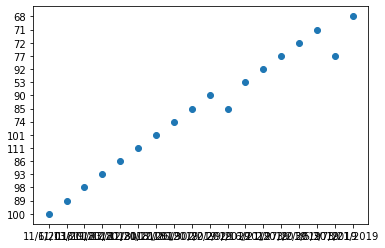

Charlotte


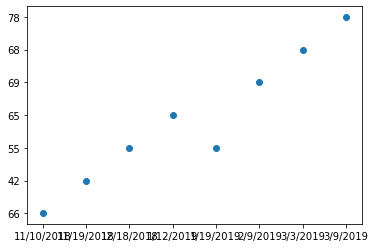

Chattanooga


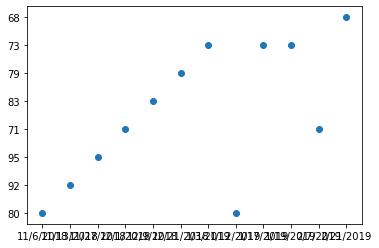

Chicago State


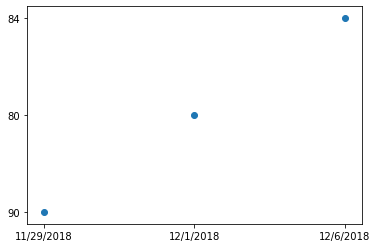

Cincinnati


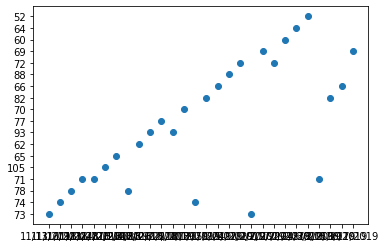

Citadel


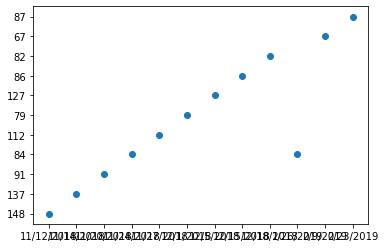

Clemson


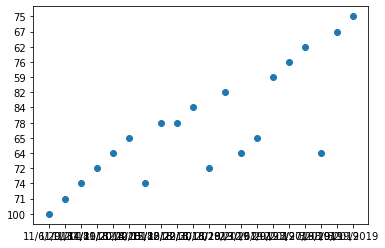

Cleveland State


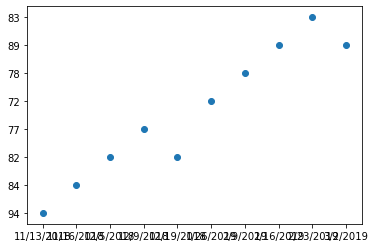

Coastal Carolina


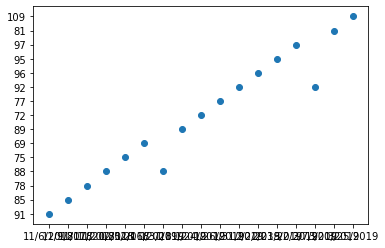

Colgate


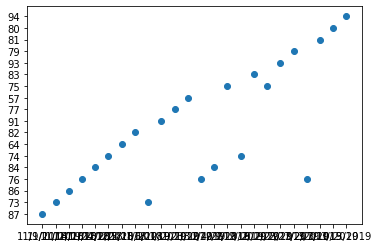

College of Charleston


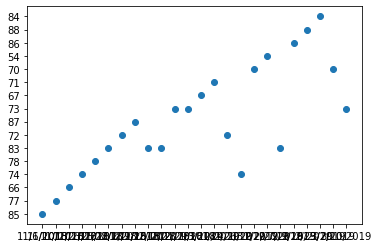

Colorado


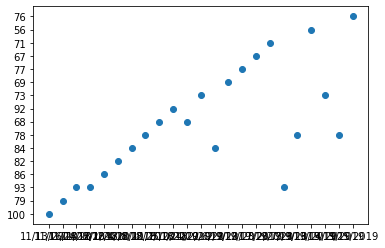

Colorado State


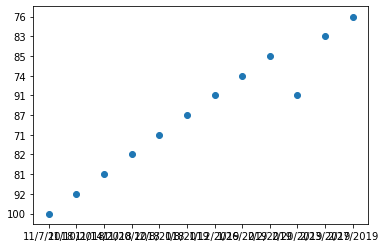

Columbia


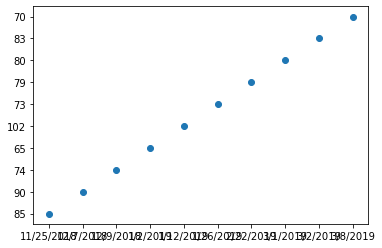

Coppin State


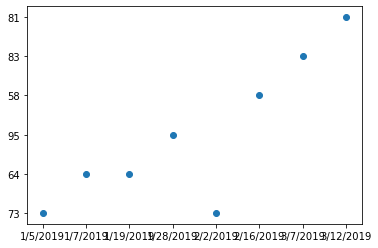

Cornell


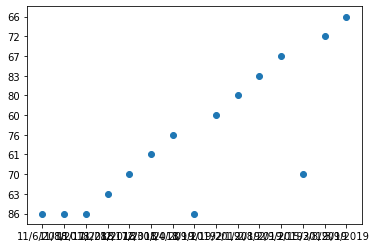

Creighton


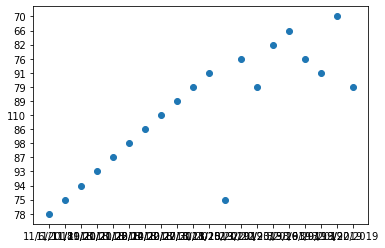

Dartmouth


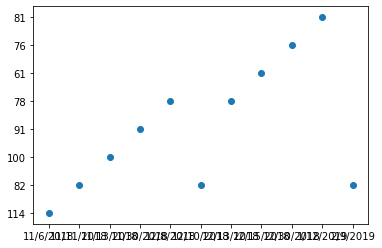

Davidson


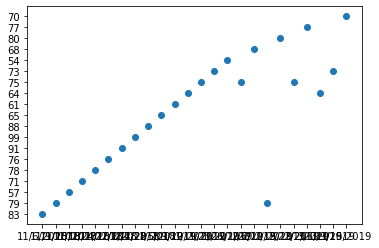

Dayton


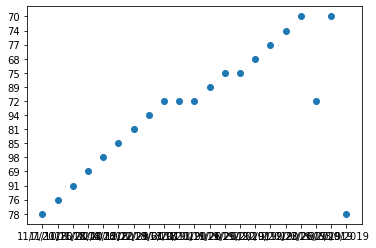

DePaul


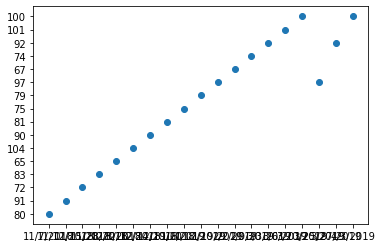

Delaware


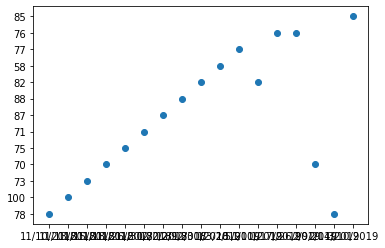

Delaware State


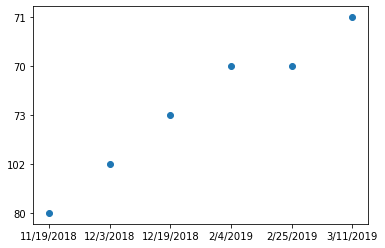

Denver


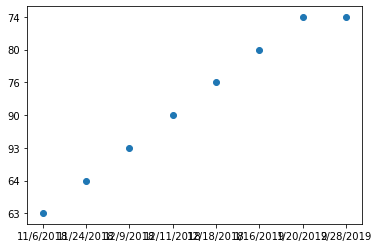

Detroit


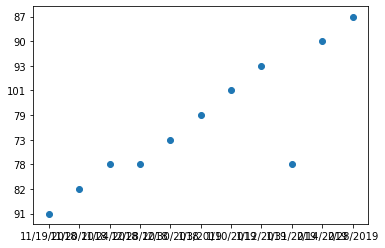

Drake


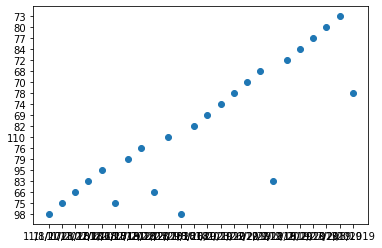

Drexel


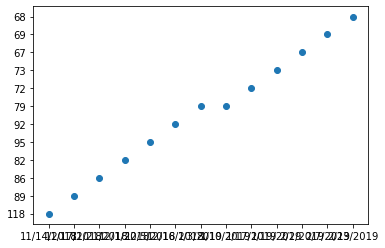

Duke


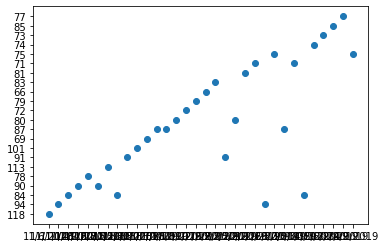

Duquesne


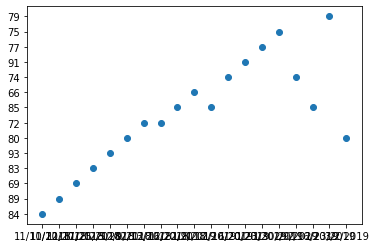

ETSU


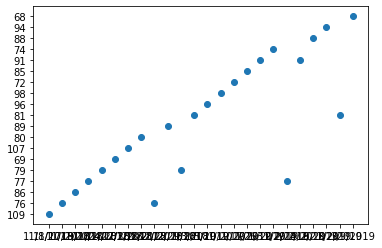

East Carolina


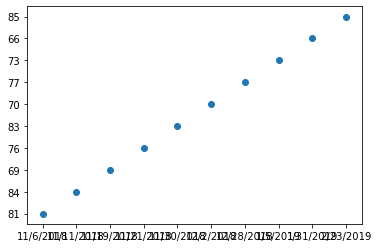

Eastern Illinois


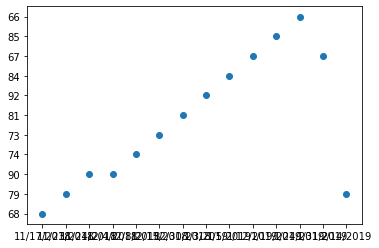

Eastern Kentucky


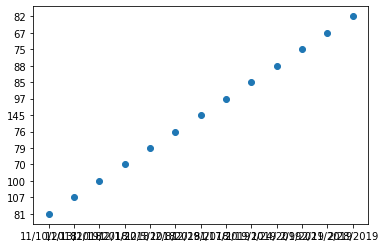

Eastern Michigan


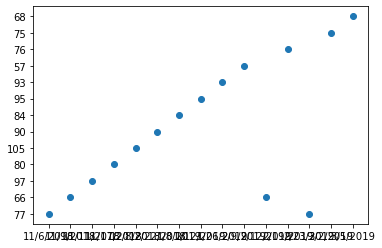

Eastern Washington


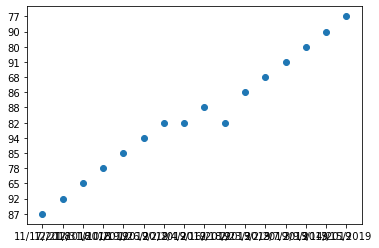

Elon


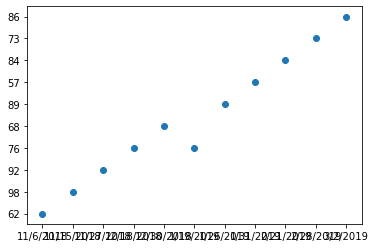

Evansville


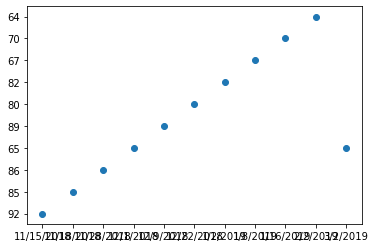

Fairfield


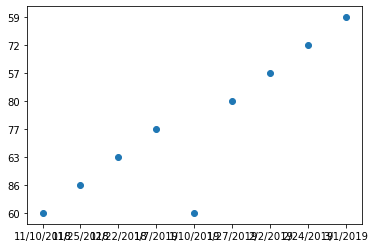

Fairleigh Dickinson


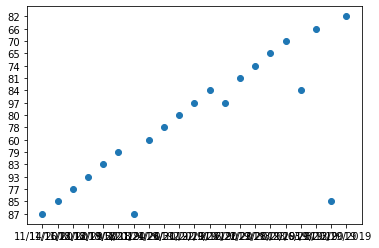

Fayetteville State


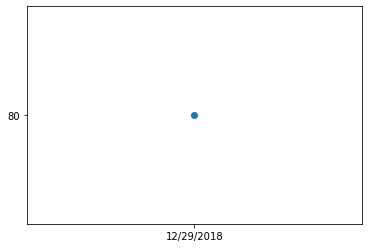

Florida


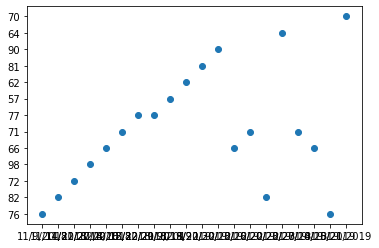

Florida A&M


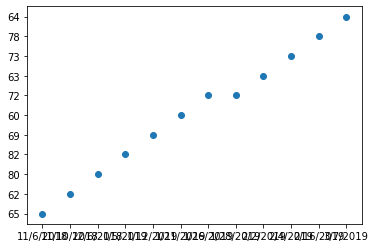

Florida Atlantic


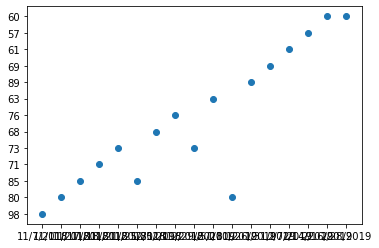

Florida Gulf Coast


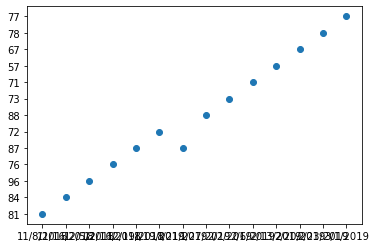

Florida International


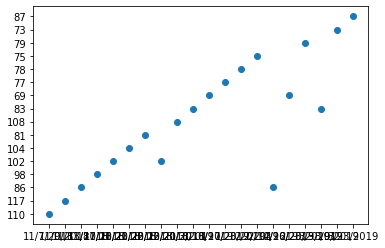

Florida State


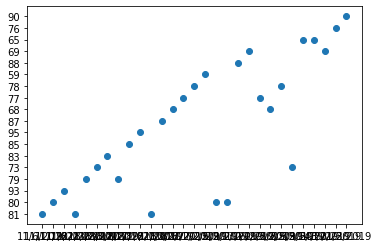

Fordham


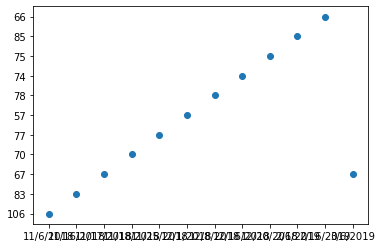

Fresno State


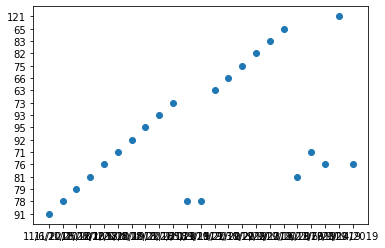

Furman


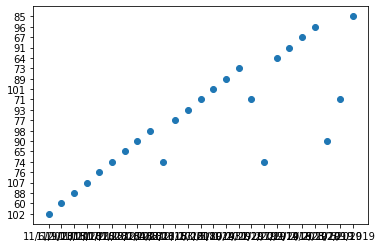

Gardner-Webb


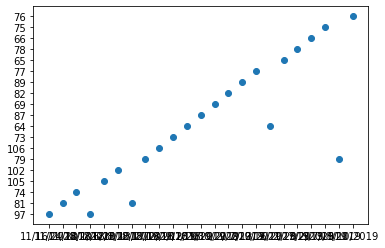

George Mason


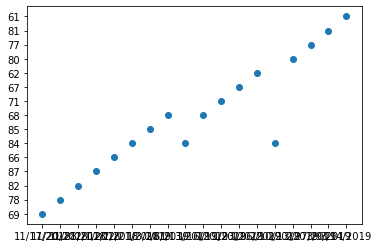

George Washington


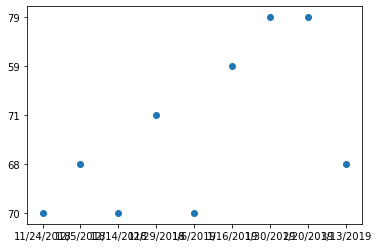

Georgetown


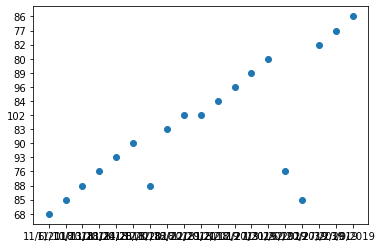

Georgia


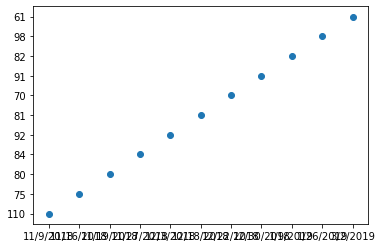

Georgia Southern


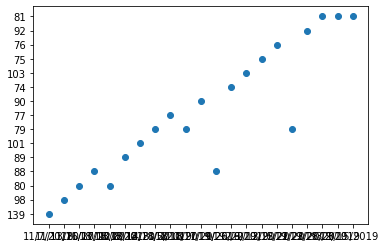

Georgia State


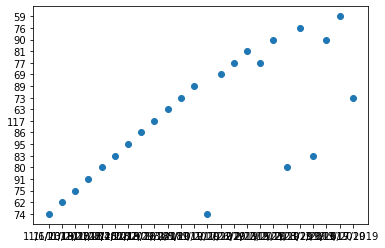

Georgia Tech


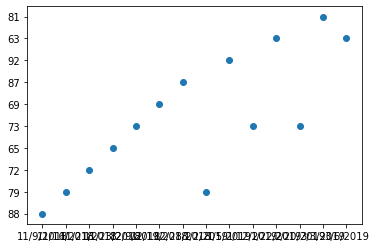

Gonzaga


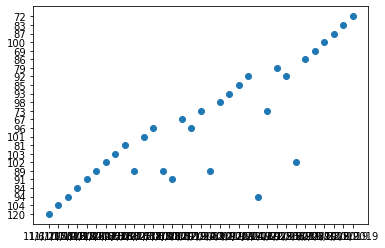

Grambling


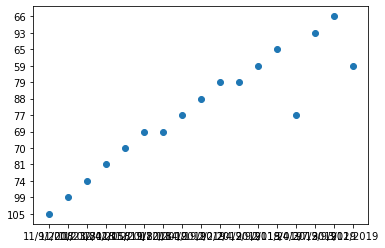

Grand Canyon


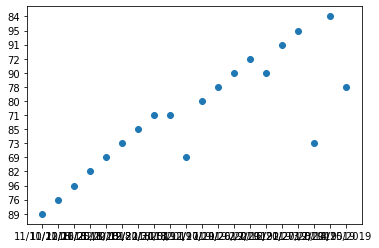

Green Bay


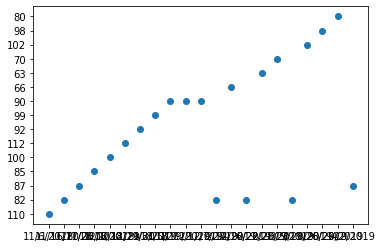

Hampton


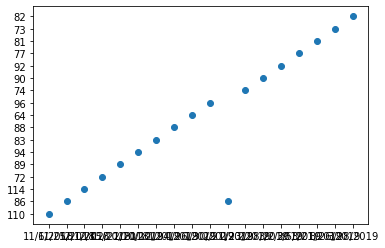

Hartford


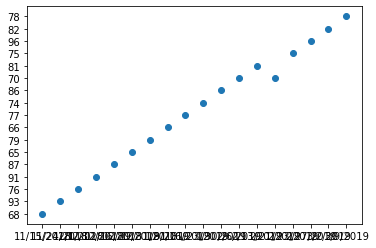

Harvard


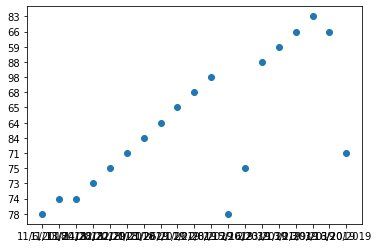

Hawaii


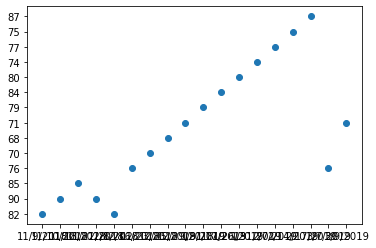

High Point


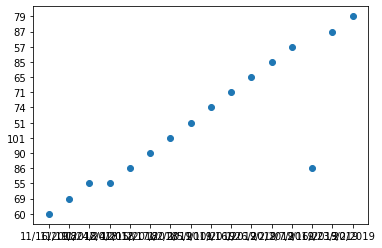

Hofstra


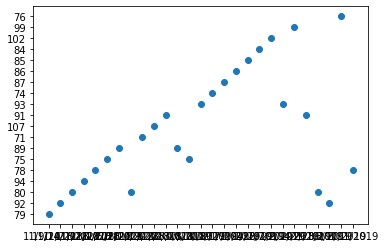

Holy Cross


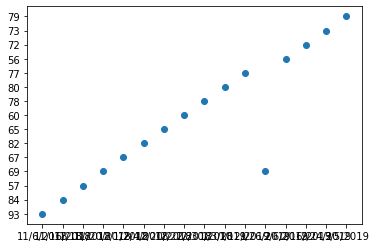

Houston


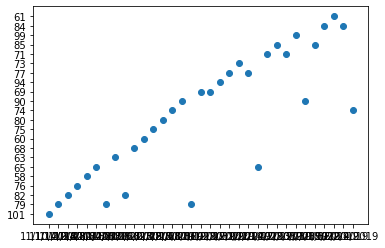

Houston Baptist


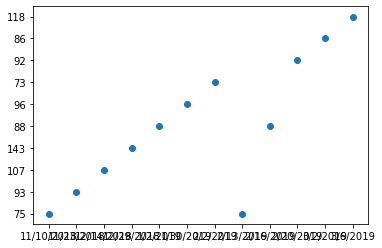

Howard


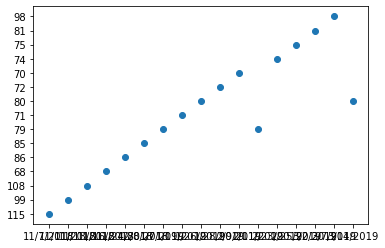

IUPUI


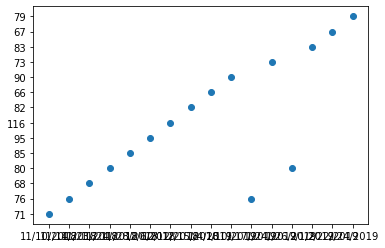

Idaho


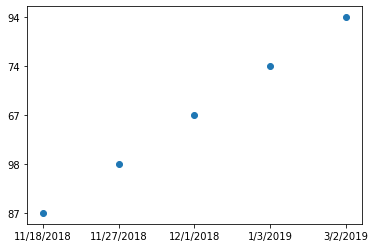

Idaho State


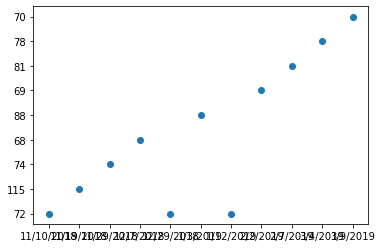

Illinois


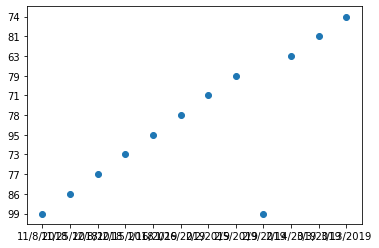

Illinois State


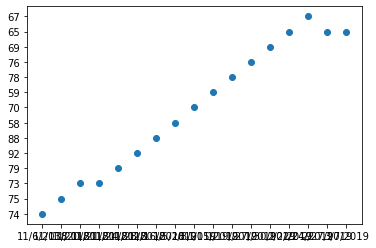

Incarnate Word


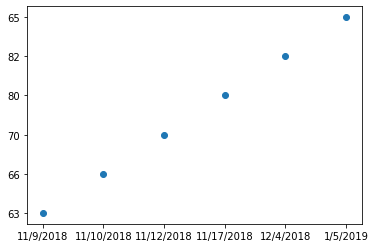

Indiana


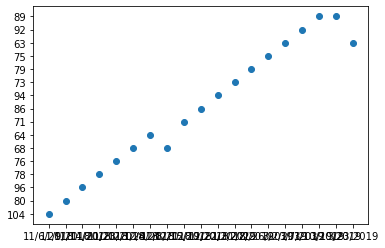

Indiana State


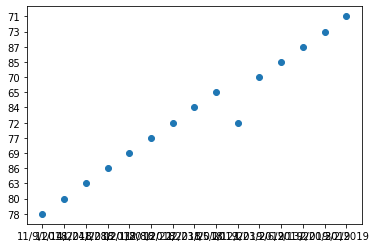

Iona


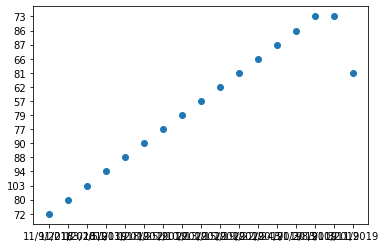

Iowa


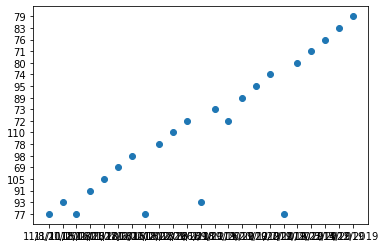

Iowa State


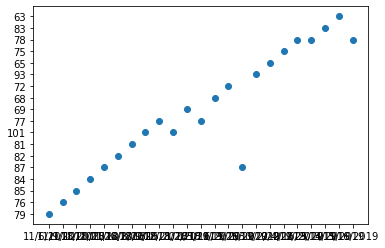

Jackson State


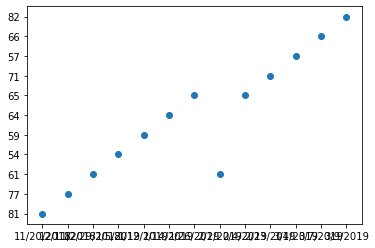

Jacksonville


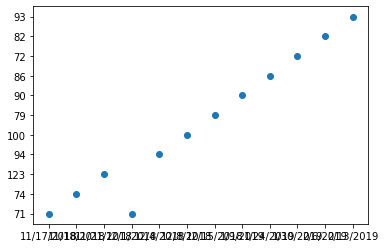

Jacksonville State


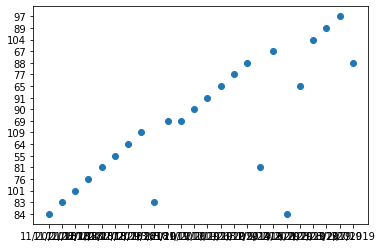

James Madison


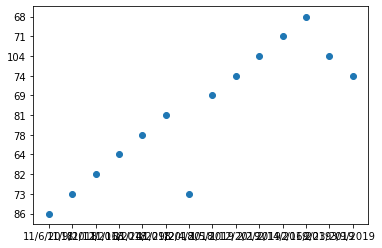

Kansas


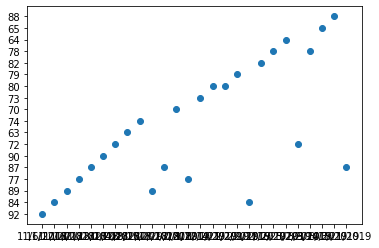

Kansas State


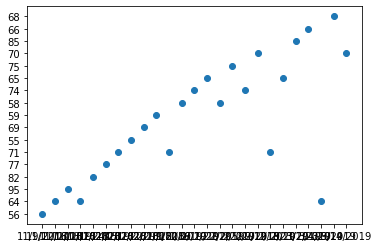

Kennesaw State


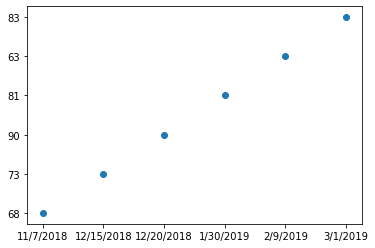

Kent State


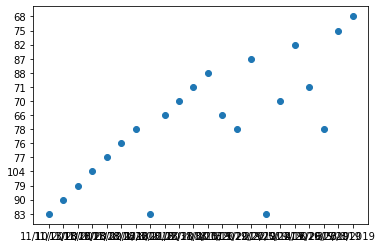

Kentucky


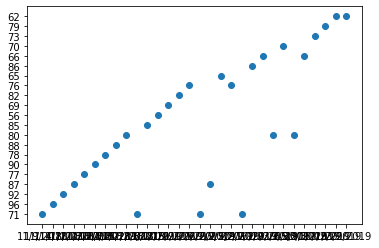

LIU


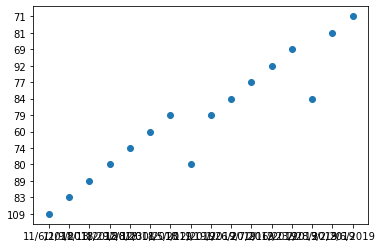

LSU


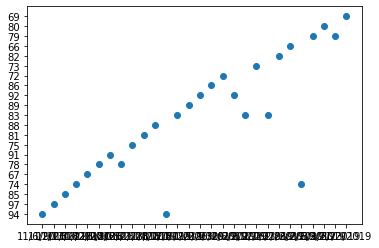

La Salle


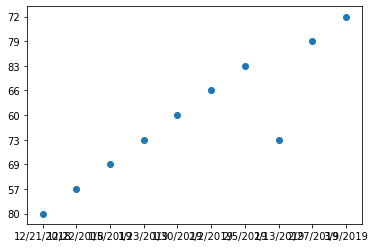

Lafayette


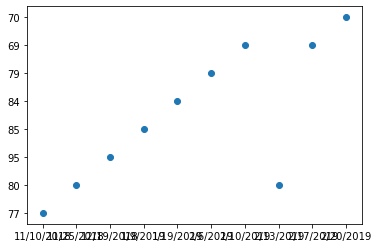

Lamar


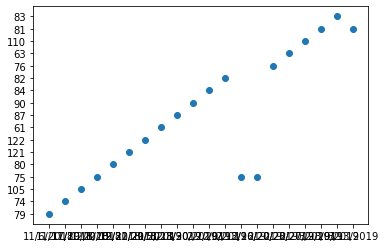

Lehigh


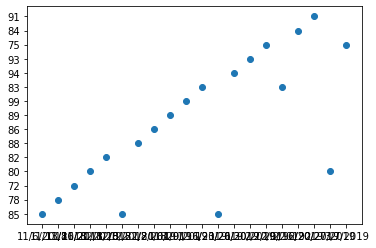

Liberty


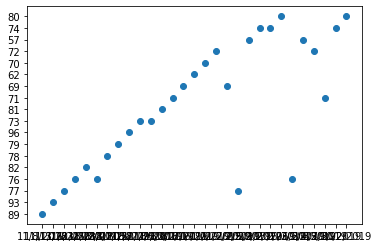

Lincoln (PA)


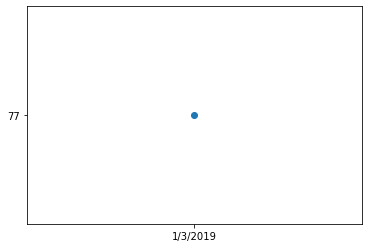

Lipscomb


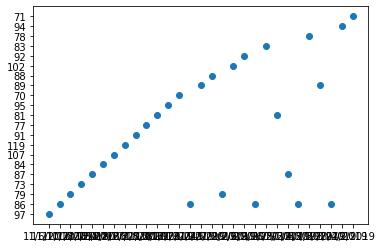

Little Rock


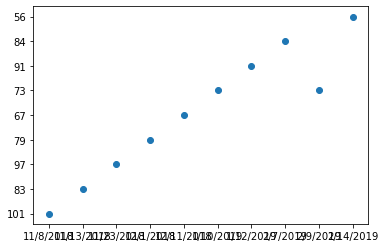

Long Beach State


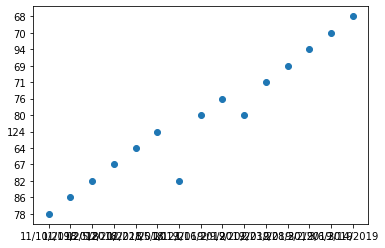

Longwood


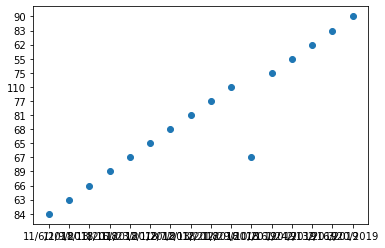

Louisiana


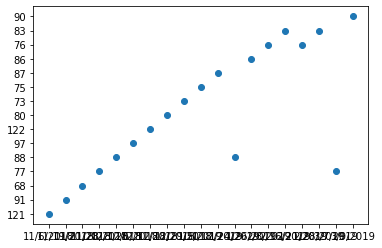

Louisiana Tech


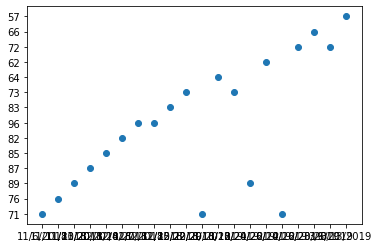

Louisiana-Monroe


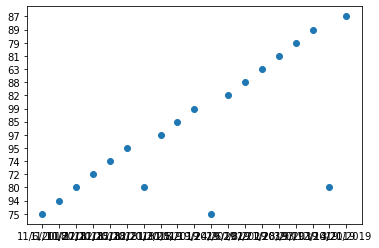

Louisville


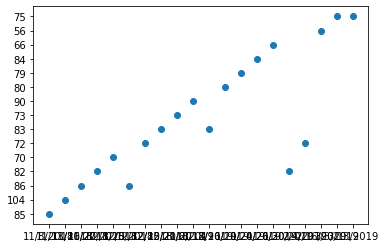

Loyola (IL)


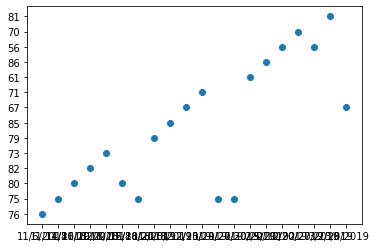

Loyola (LA)


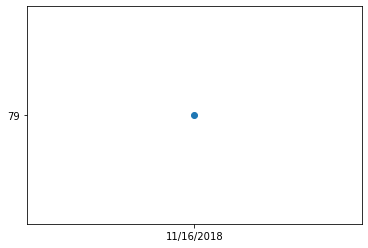

Loyola (MD)


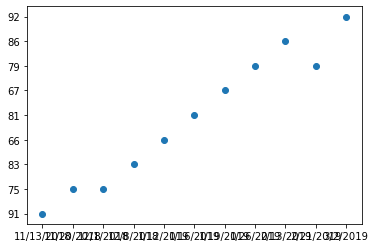

Loyola Marymount


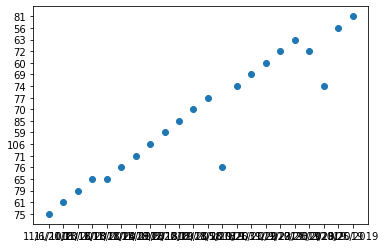

Maine


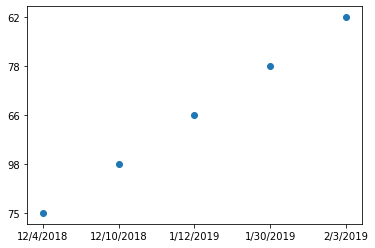

Manhattan


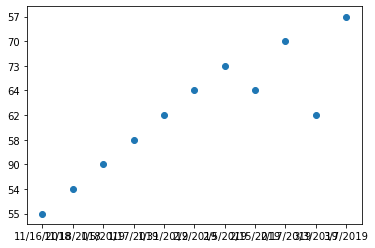

Marist


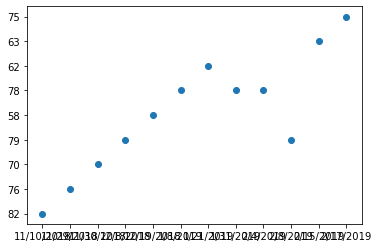

Marquette


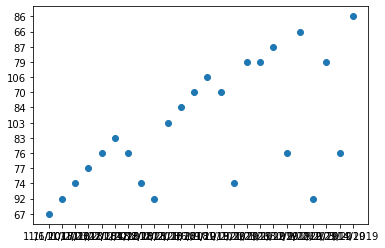

Marshall


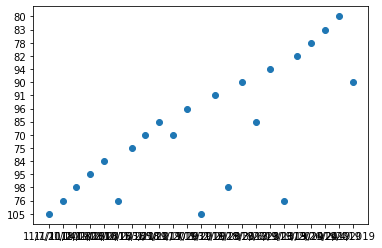

Maryland


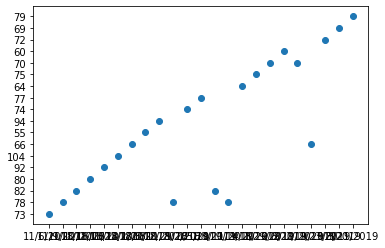

Maryland-Eastern Shore


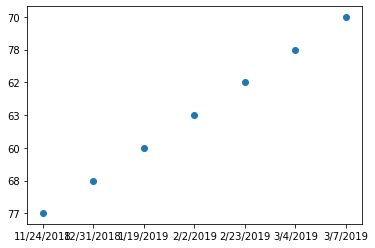

McNeese State


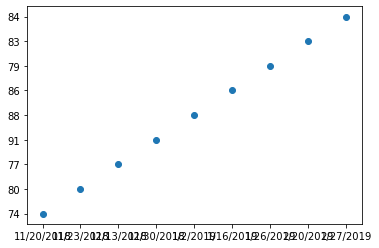

Memphis


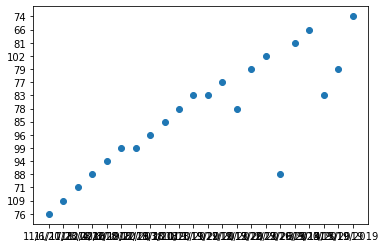

Mercer


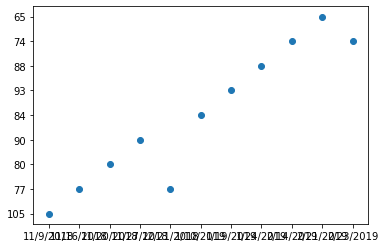

Miami (FL)


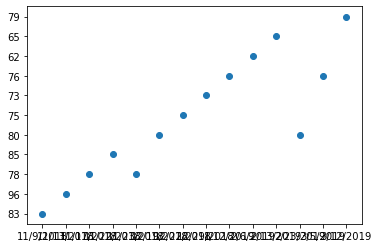

Miami (OH)


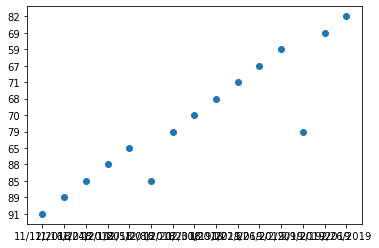

Michigan


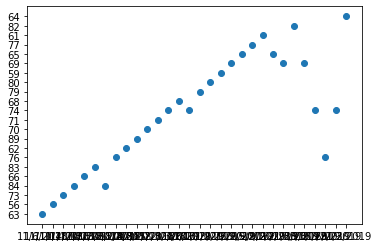

Michigan State


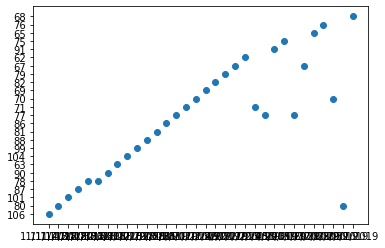

Middle Tennessee


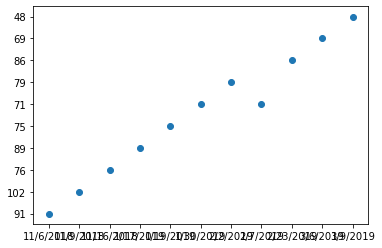

Milwaukee


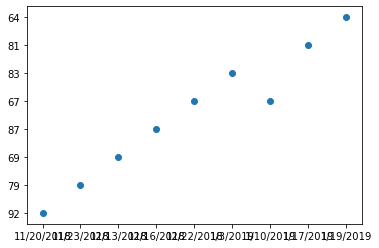

Minnesota


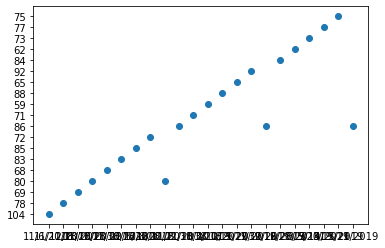

Mississippi State


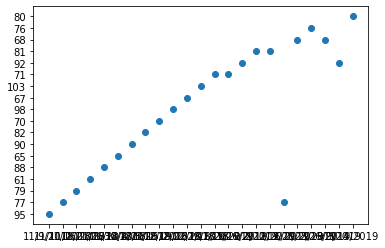

Mississippi Valley State


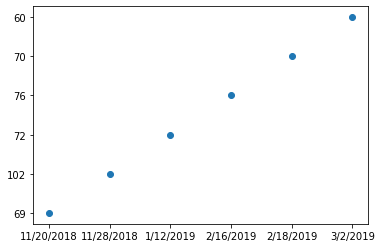

Missouri


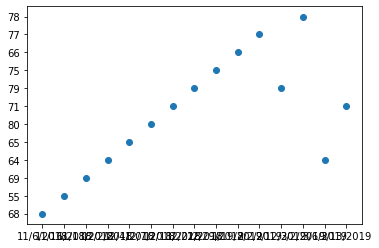

Missouri State


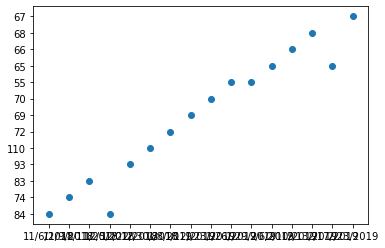

Monmouth


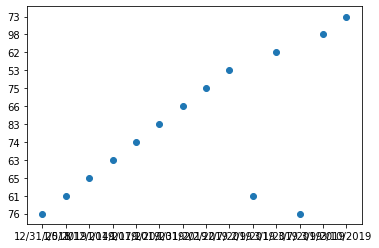

Montana


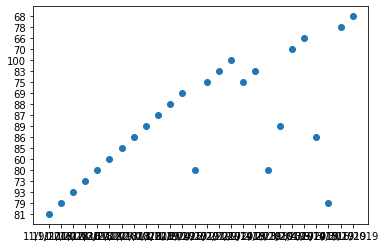

Montana State


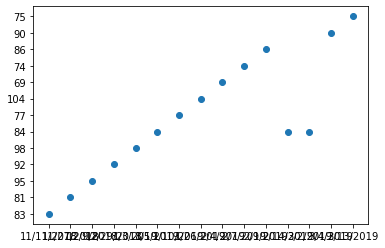

Morehead State


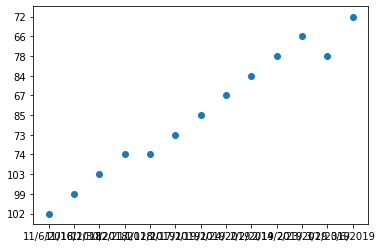

Morgan State


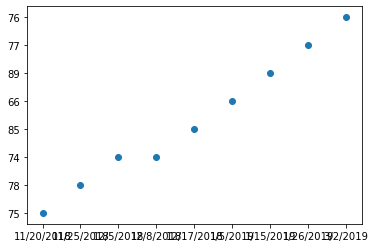

Mount St. Mary's


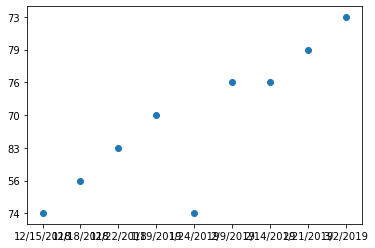

Murray State


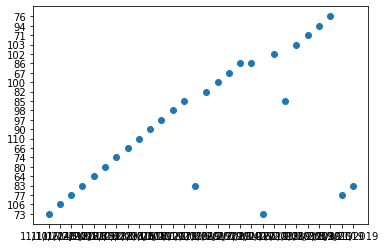

NC State


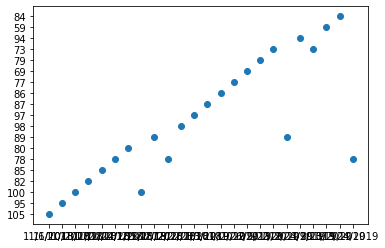

NJIT


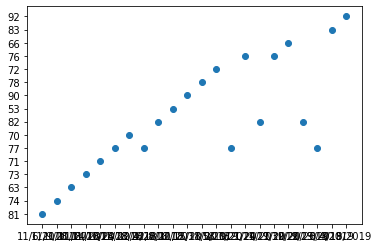

Navy


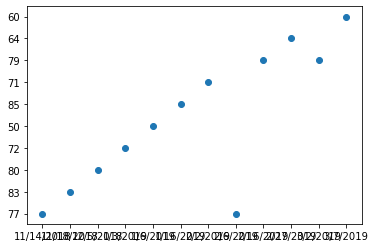

Nebraska


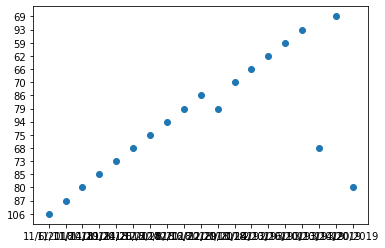

Nevada


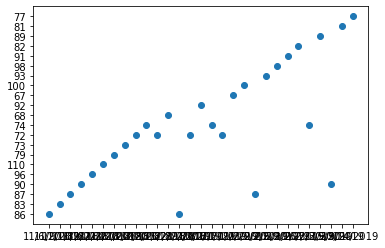

New Hampshire


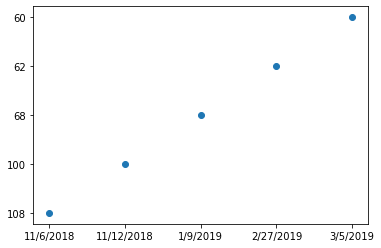

New Mexico


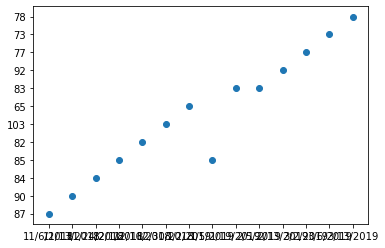

New Mexico State


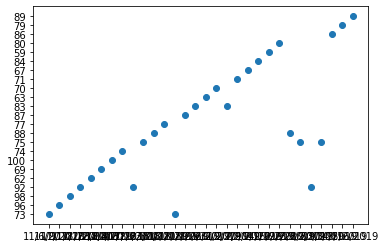

New Orleans


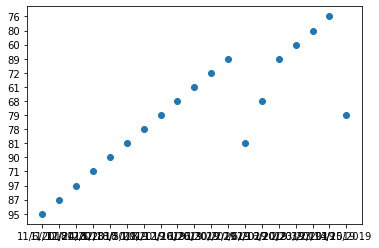

Niagara


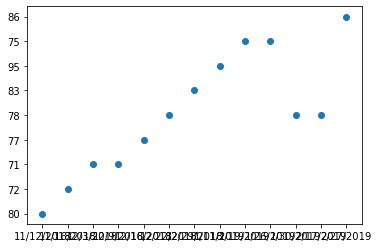

Nicholls State


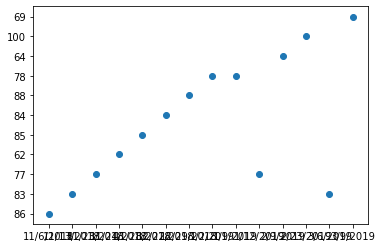

Norfolk State


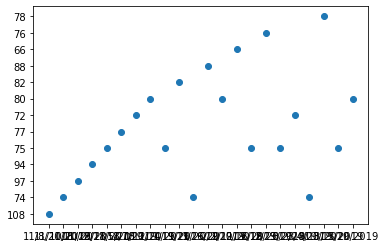

North Alabama


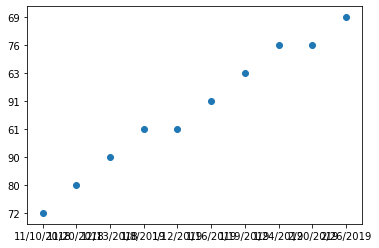

North Carolina A&T


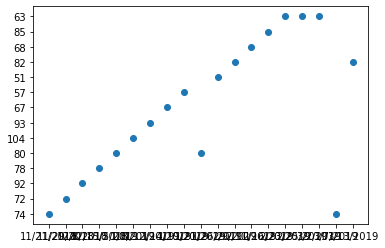

North Carolina Central


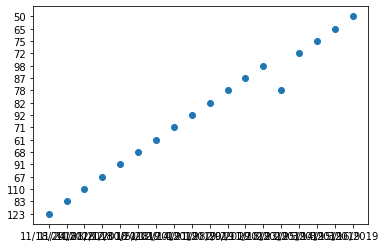

North Dakota


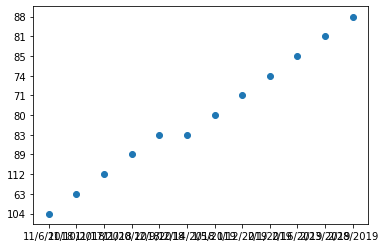

North Dakota State


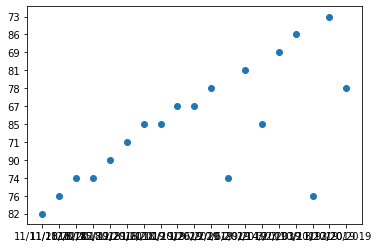

North Florida


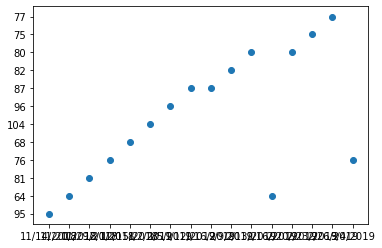

North Texas


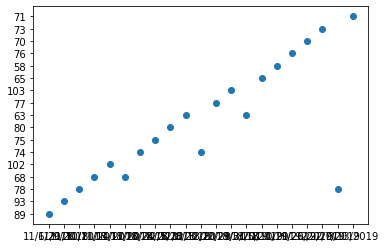

Northeastern


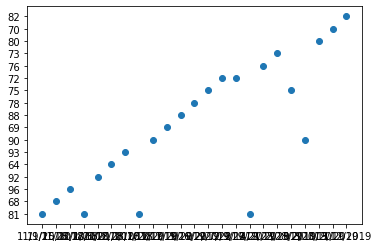

Northern Arizona


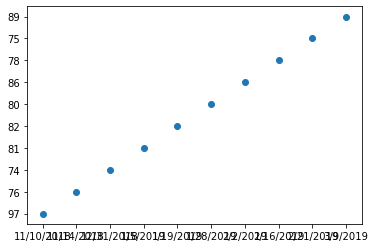

Northern Colorado


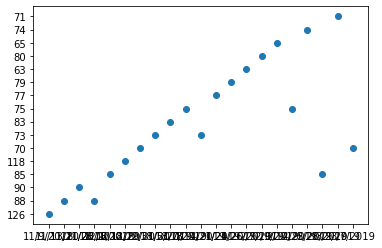

Northern Illinois


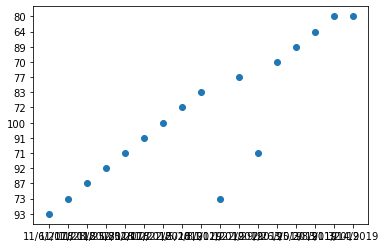

Northern Iowa


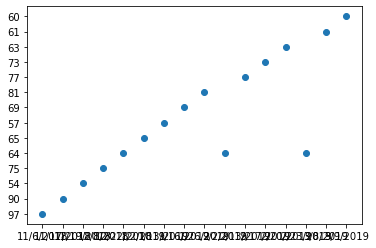

Northern Kentucky


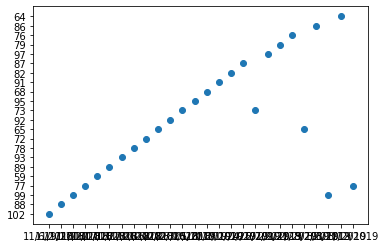

Northwest Nazarene


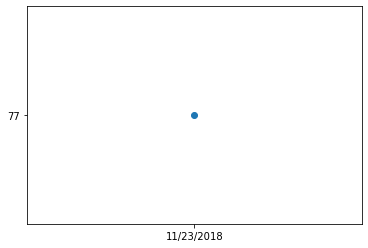

Northwestern


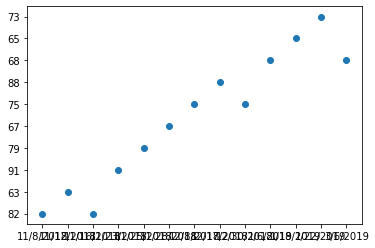

Northwestern State


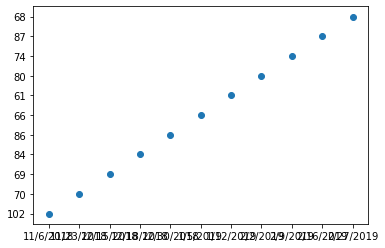

Notre Dame


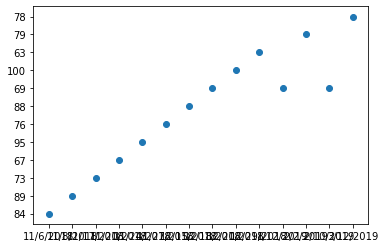

Oakland


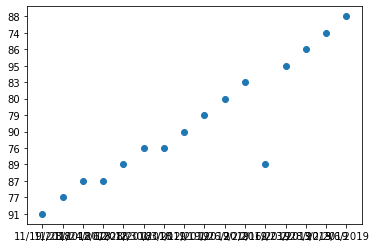

Ohio


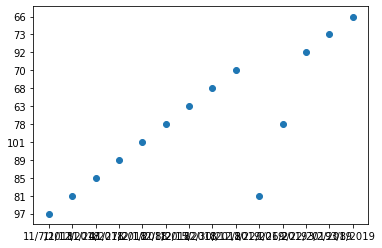

Ohio State


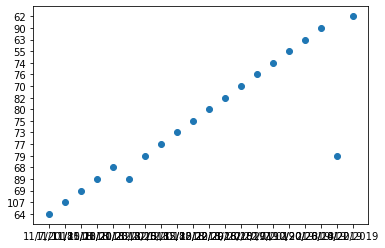

Oklahoma


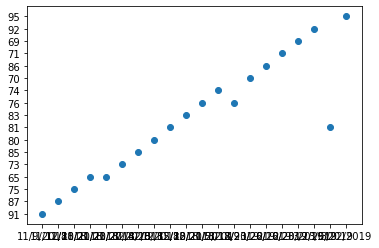

Oklahoma State


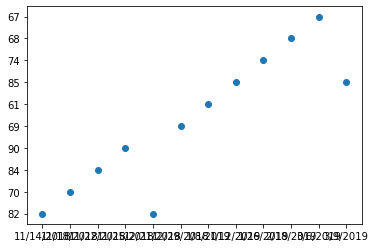

Old Dominion


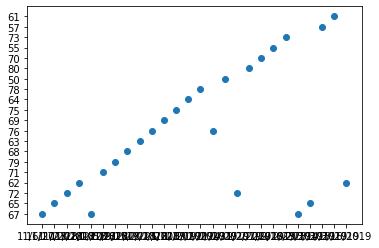

Ole Miss


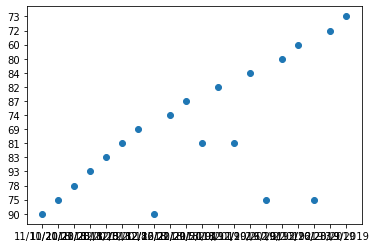

Omaha


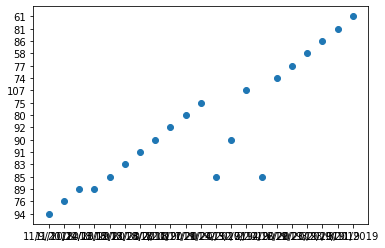

Oral Roberts


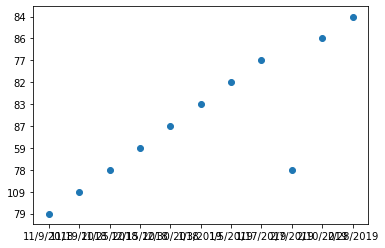

Oregon


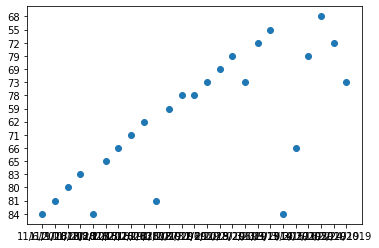

Oregon State


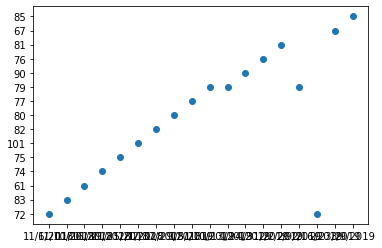

Pacific


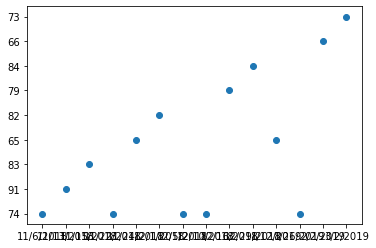

Penn


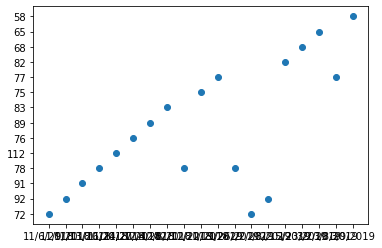

Penn State


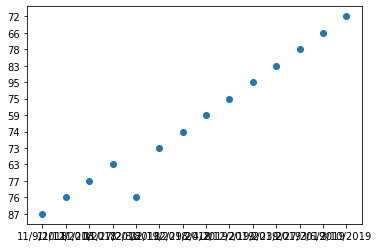

Pepperdine


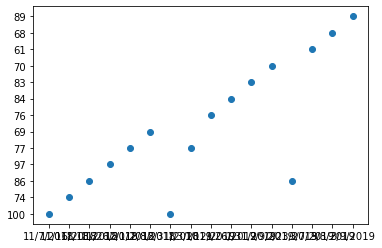

Pitt


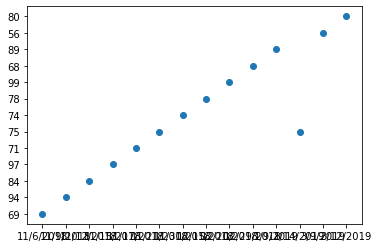

Portland


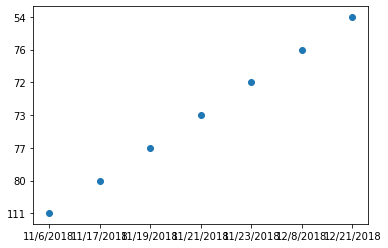

Portland State


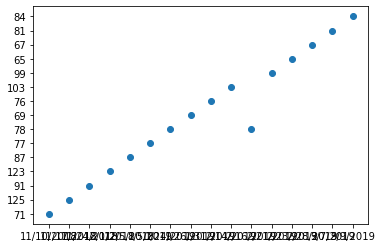

Prairie View


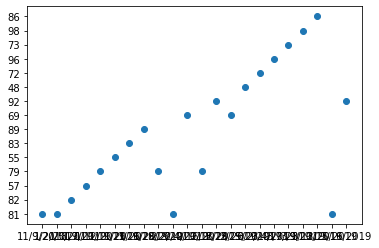

Presbyterian


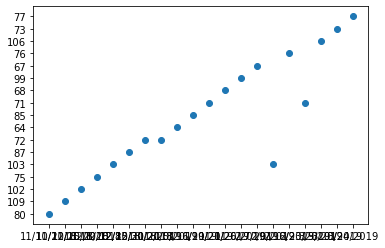

Princeton


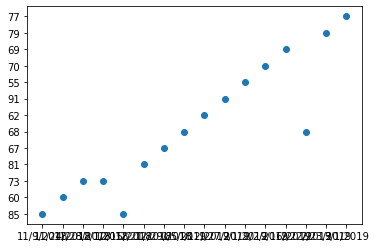

Providence


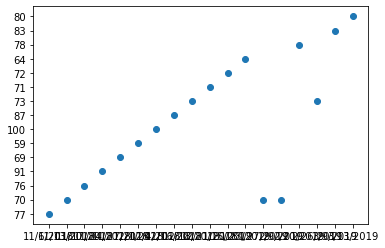

Purdue


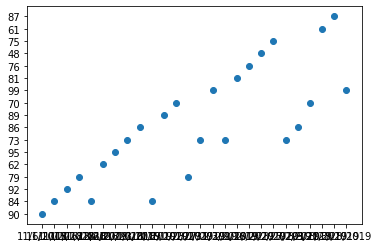

Purdue-Fort Wayne


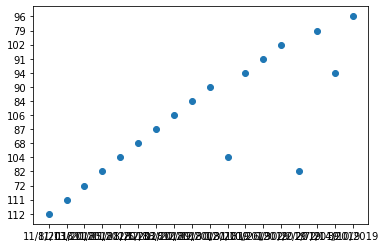

Quinnipiac


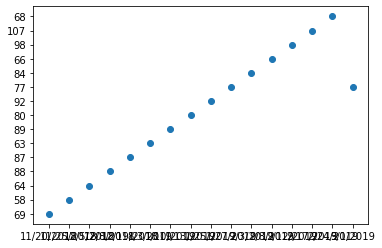

Radford


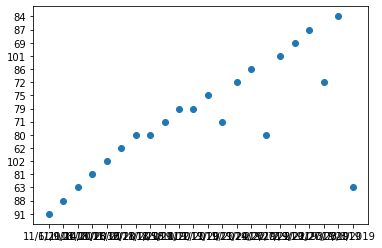

Rhode Island


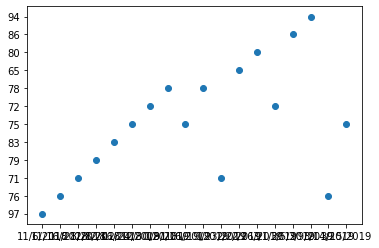

Rice


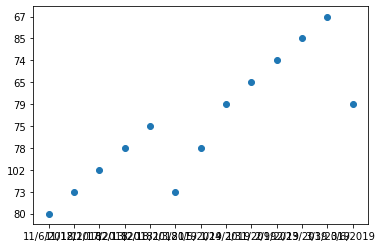

Richmond


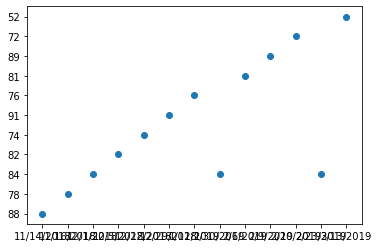

Rider


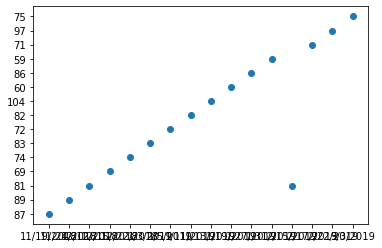

Robert Morris


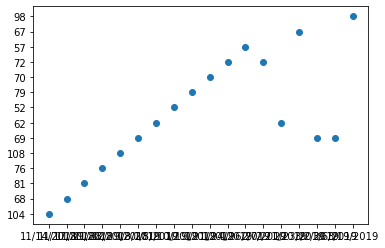

Rutgers


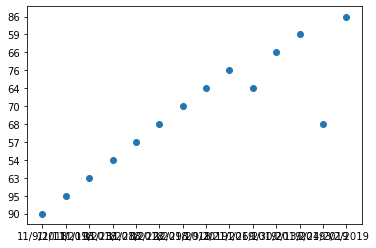

SIU-Edwardsville


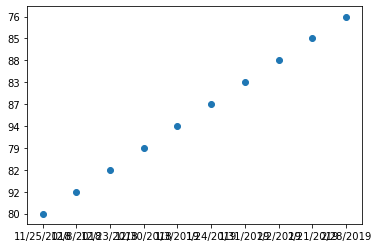

SMU


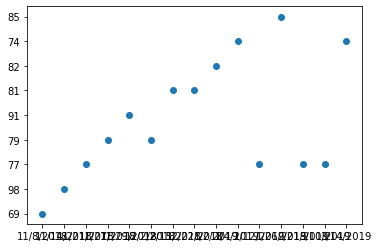

Sacramento State


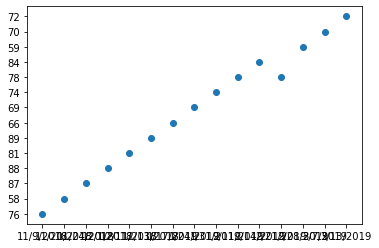

Sacred Heart


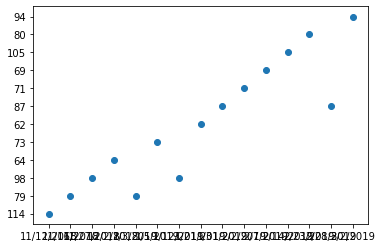

Saint Francis (PA)


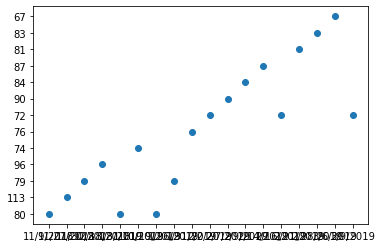

Saint Louis


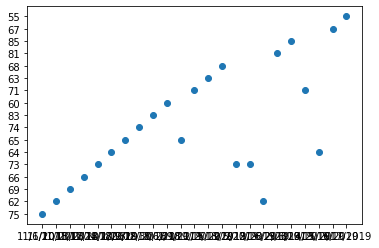

Saint Mary's


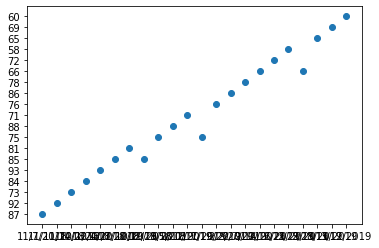

Sam Houston State


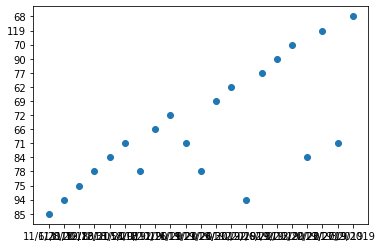

Samford


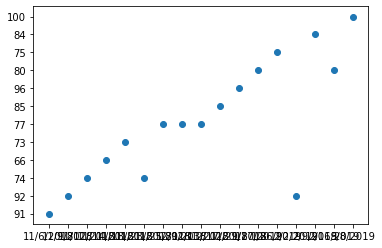

San Diego


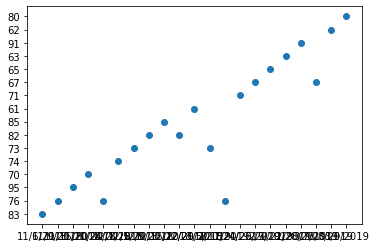

San Diego State


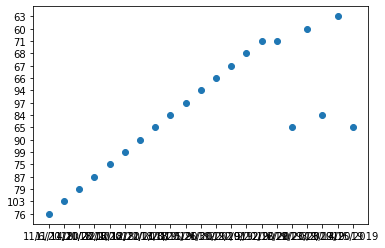

San Francisco


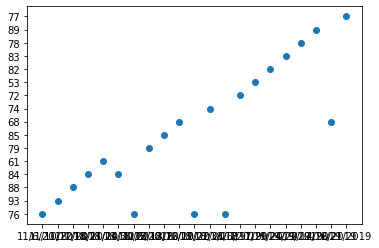

San Jose State


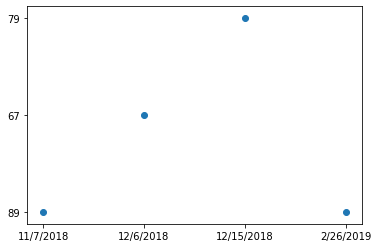

Santa Clara


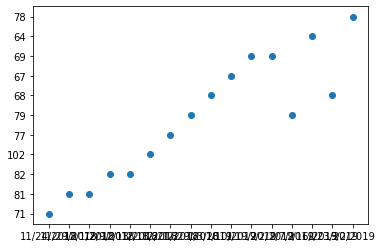

Savannah State


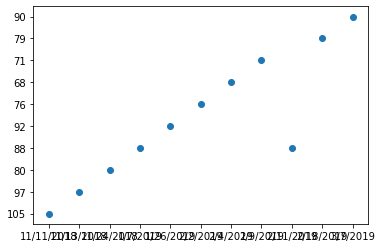

Seattle


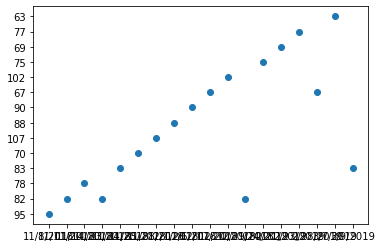

Seton Hall


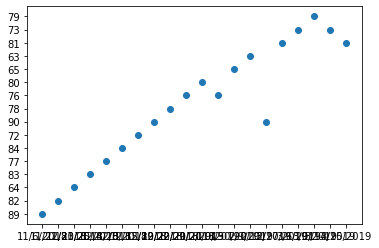

Siena


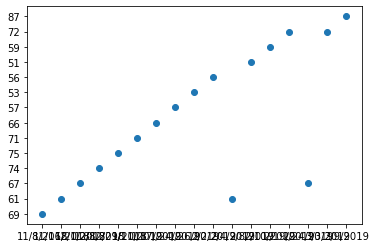

South Alabama


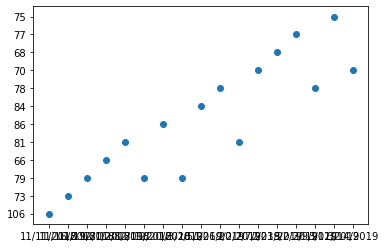

South Carolina


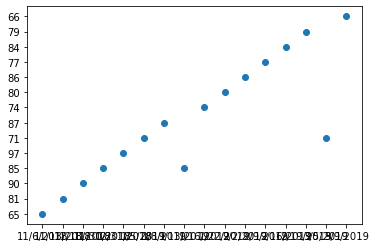

South Carolina State


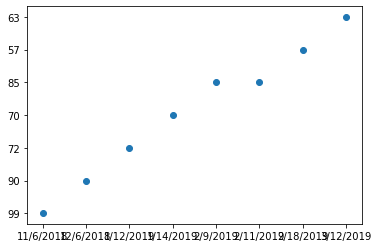

South Dakota


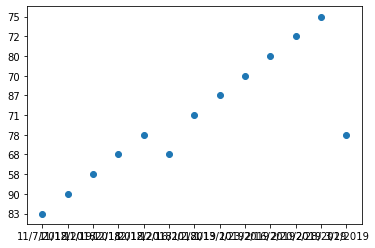

South Dakota State


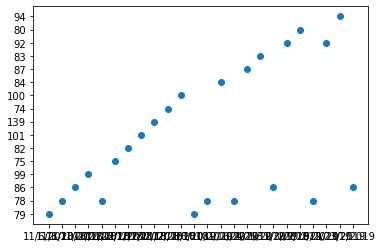

South Florida


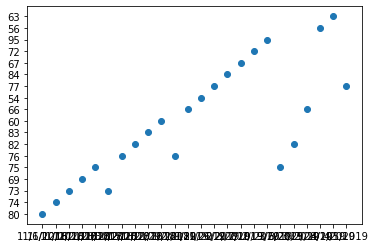

Southeast Missouri State


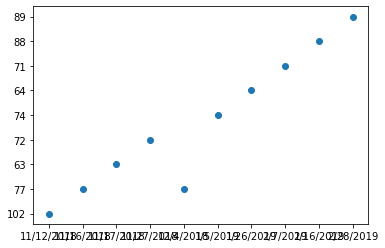

Southeastern Louisiana


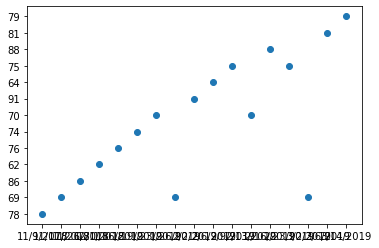

Southern


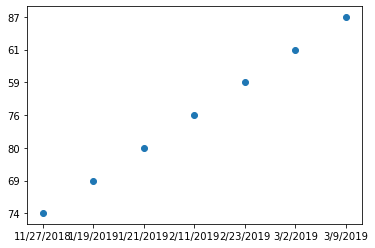

Southern Illinois


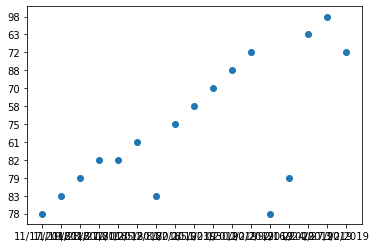

Southern Miss


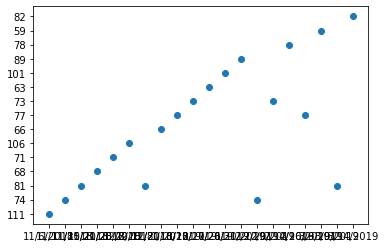

Southern Utah


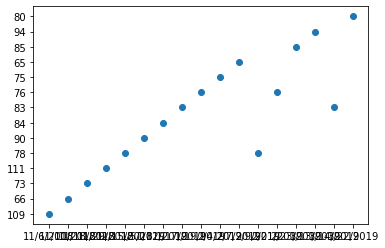

St. Bonaventure


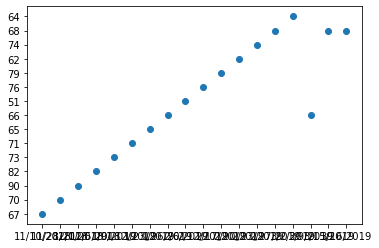

St. Edward's


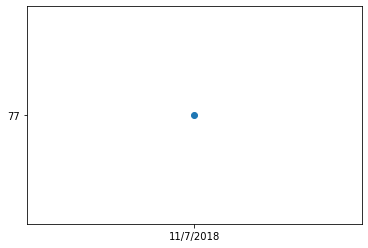

St. Francis (NY)


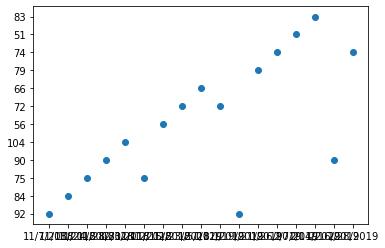

St. John's (NY)


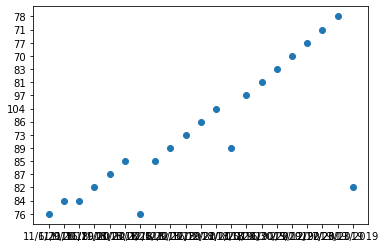

St. Joseph's


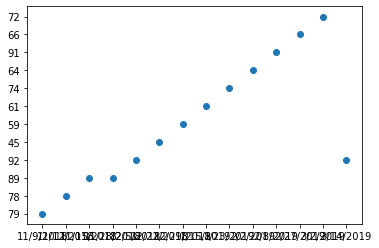

St. Peter's


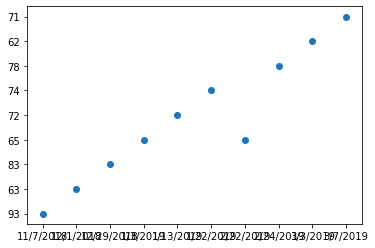

Stanford


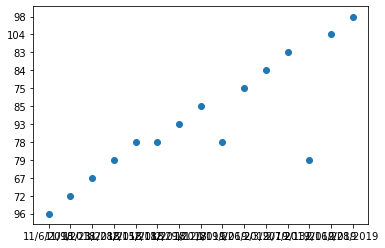

Stephen F. Austin


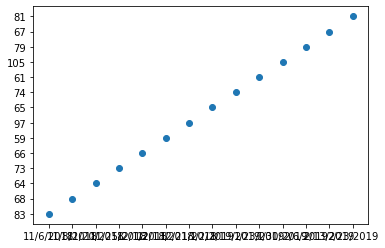

Stetson


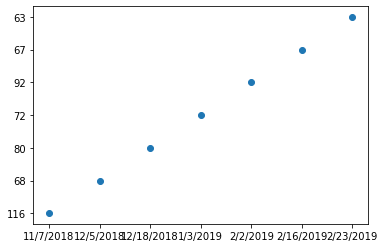

Stony Brook


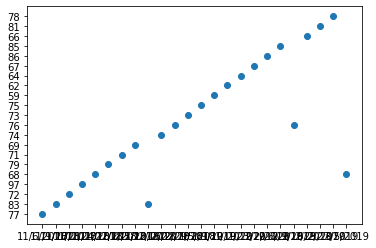

Syracuse


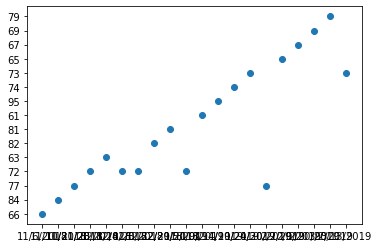

TCU


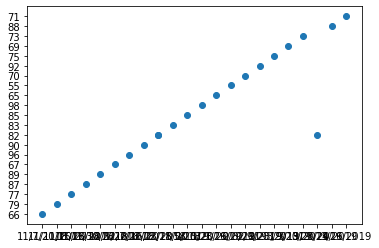

Temple


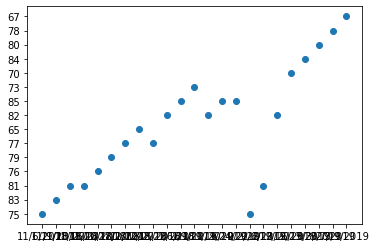

Tennessee


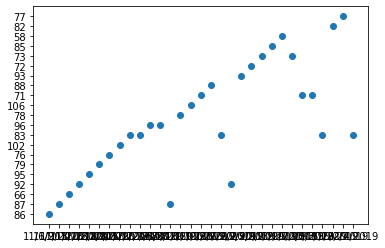

Tennessee State


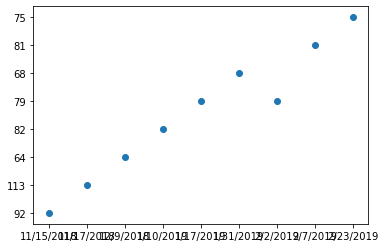

Tennessee Tech


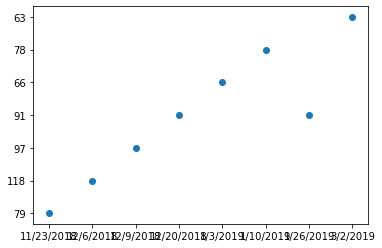

Texas


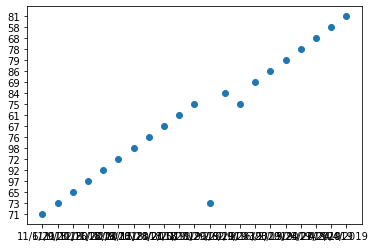

Texas A&M


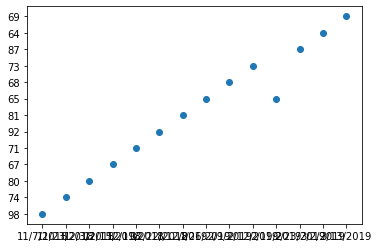

Texas A&M-Corpus Christi


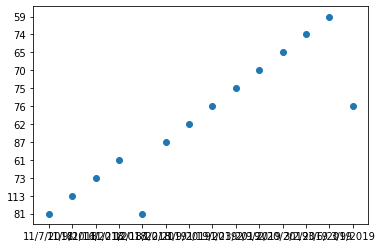

Texas Southern


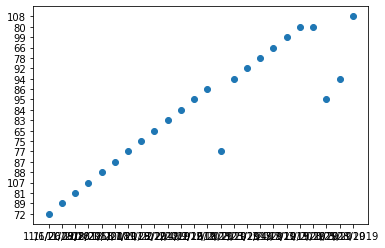

Texas State


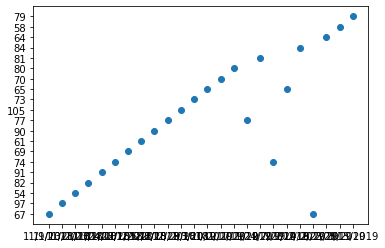

Texas Tech


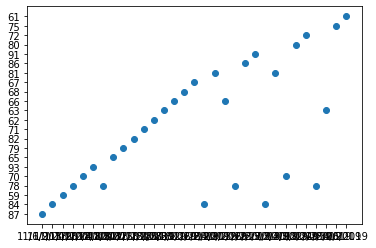

Texas-Arlington


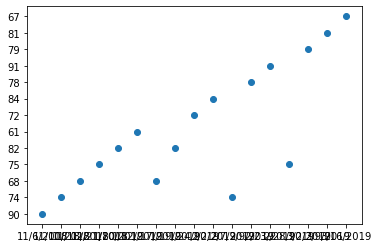

Texas-Rio Grande Valley


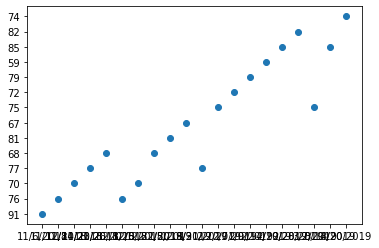

Toledo


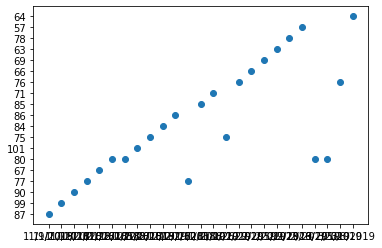

Towson


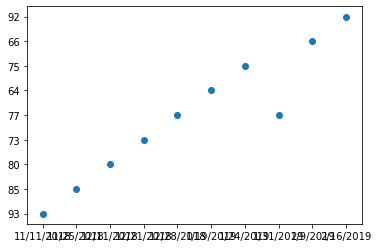

Troy


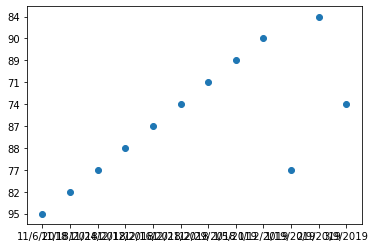

Tulane


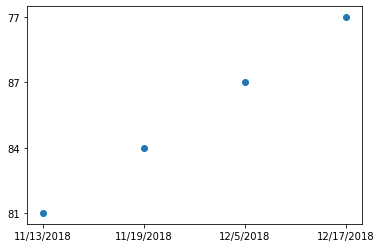

Tulsa


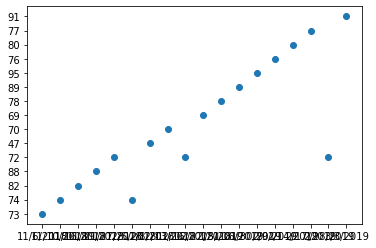

UC-Davis


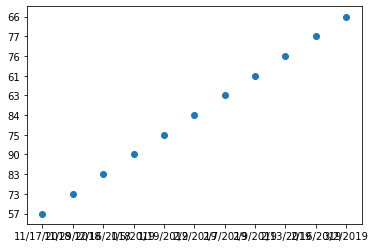

UC-Irvine


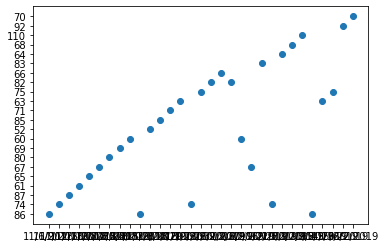

UC-Riverside


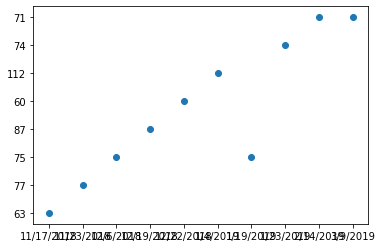

UCF


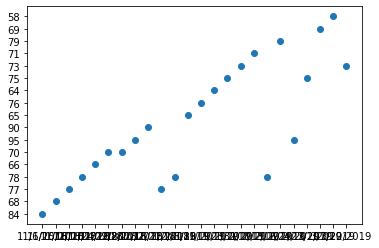

UCLA


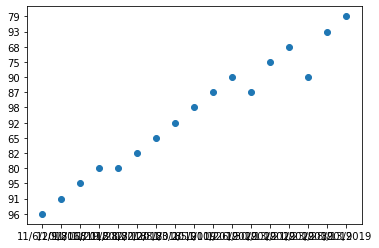

UCSB


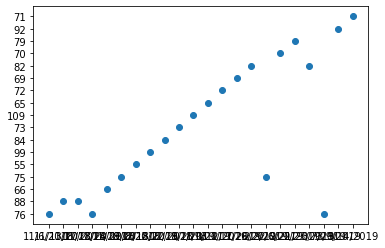

UConn


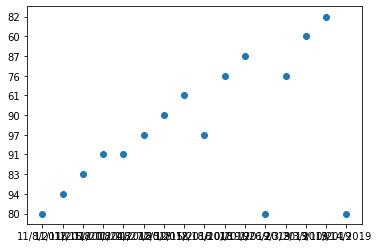

UIC


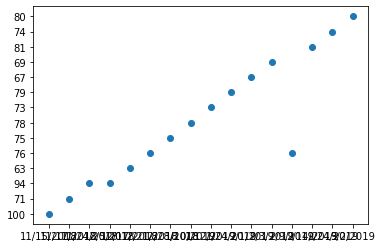

UMBC


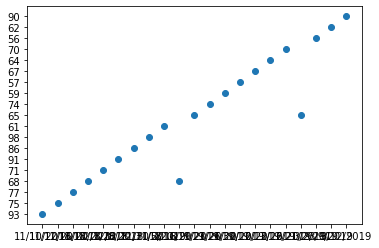

UMKC


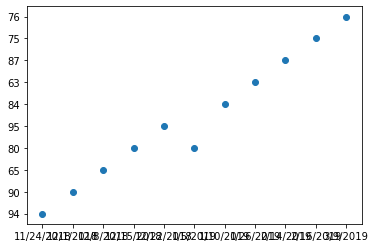

UMass


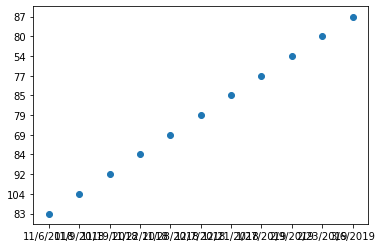

UMass-Lowell


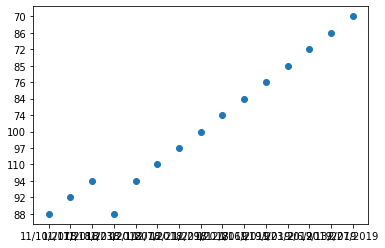

UNC


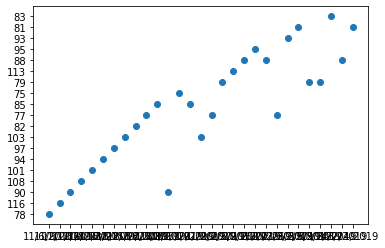

UNC Asheville


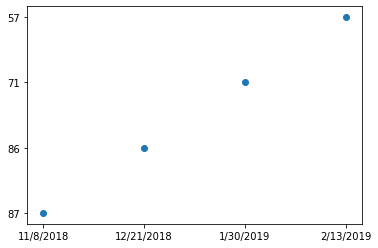

UNC Greensboro


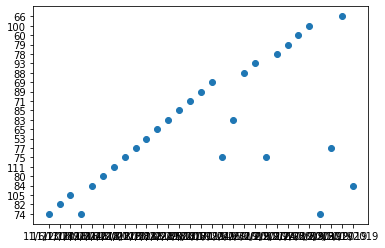

UNC Wilmington


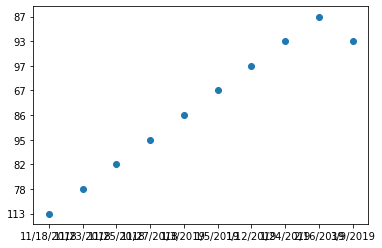

UNLV


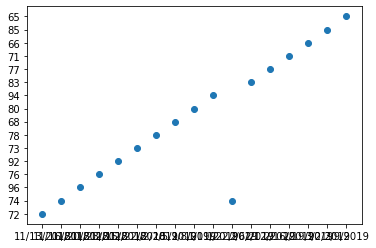

USC


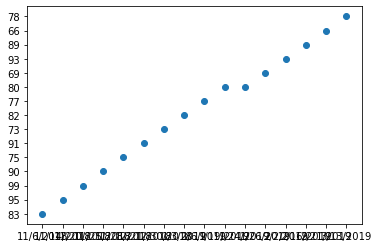

USC Upstate


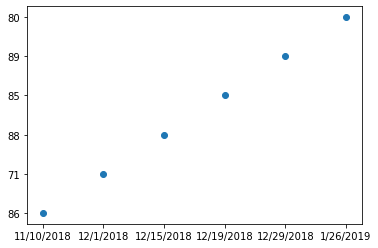

UT-Martin


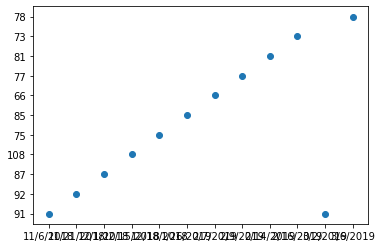

UTEP


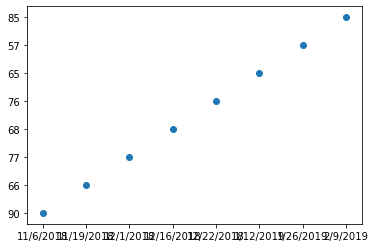

UTSA


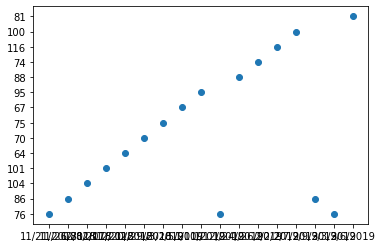

Utah


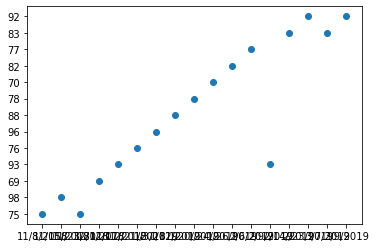

Utah State


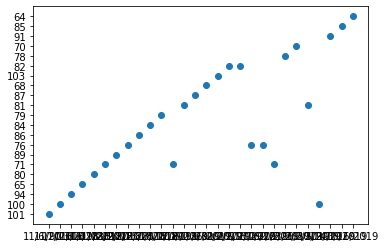

Utah Valley


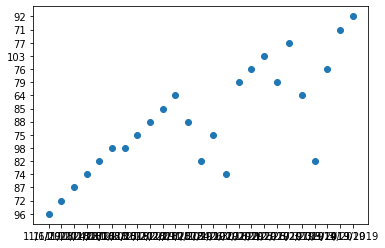

VCU


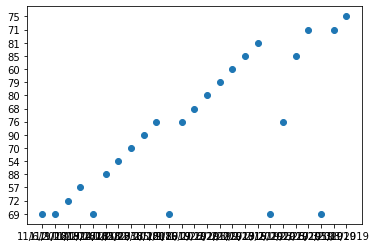

VMI


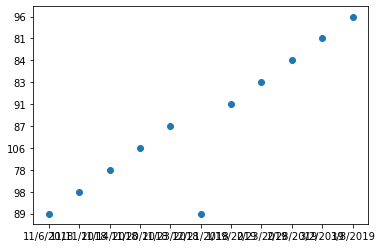

Valparaiso


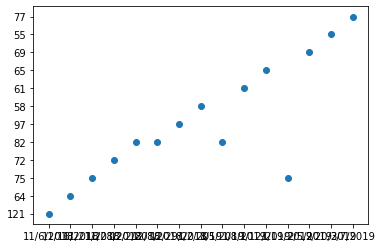

Vanderbilt


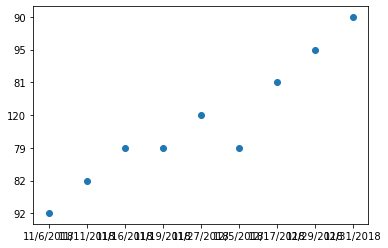

Vermont


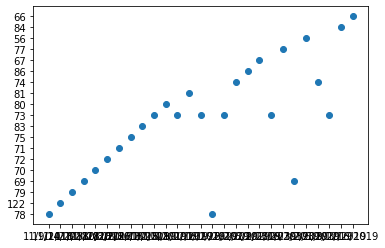

Villanova


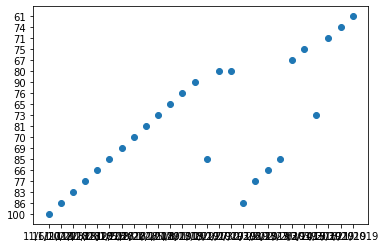

Virginia


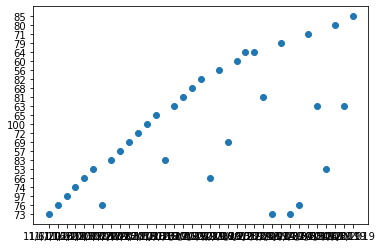

Virginia Tech


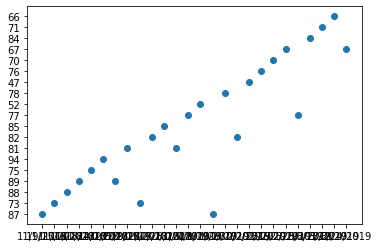

Wagner


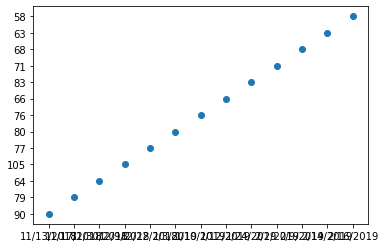

Wake Forest


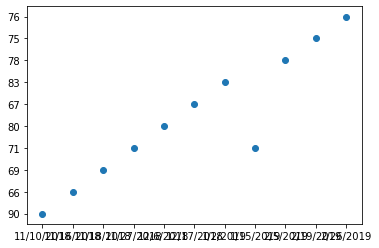

Washington


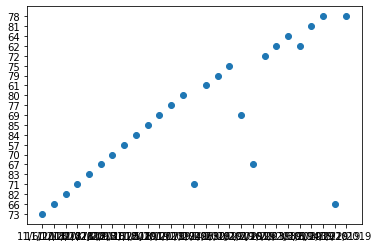

Washington State


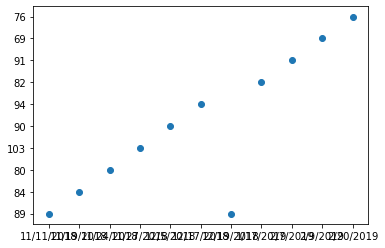

Weber State


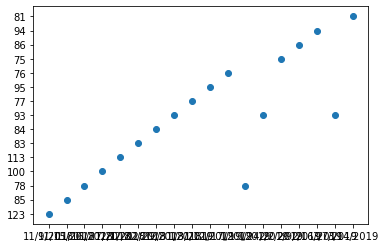

West Virginia


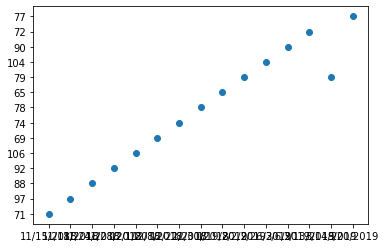

Western Carolina


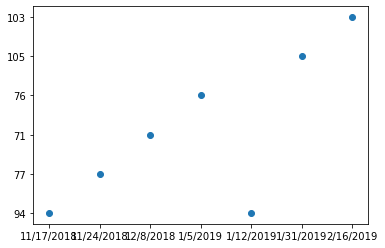

Western Illinois


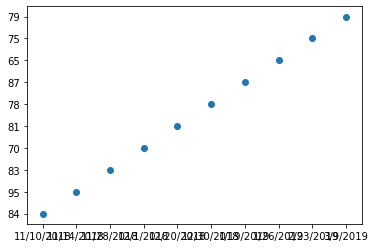

Western Kentucky


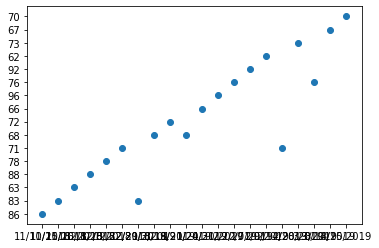

Western Michigan


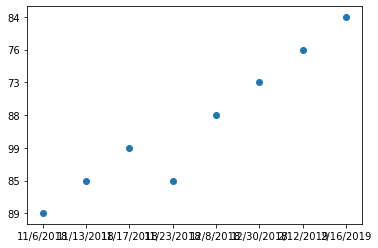

Wichita State


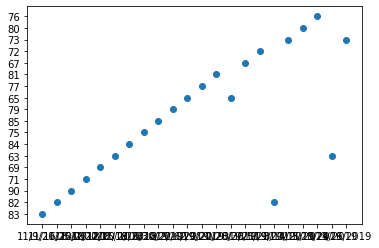

William & Mary


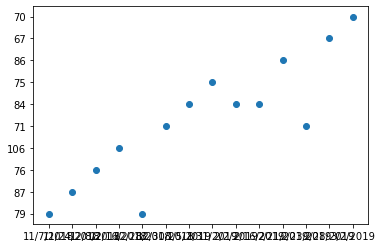

William Carey


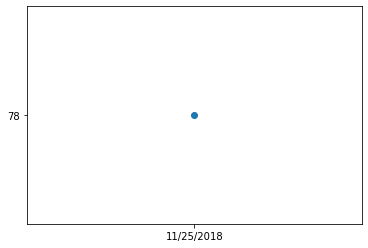

Winthrop


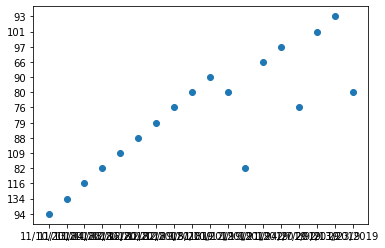

Wisconsin


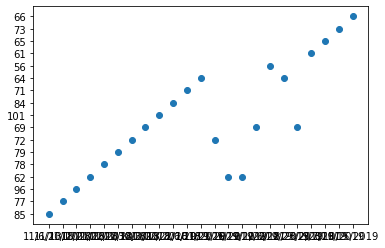

Wofford


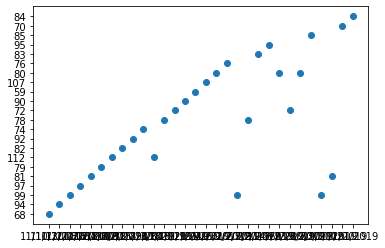

Wright State


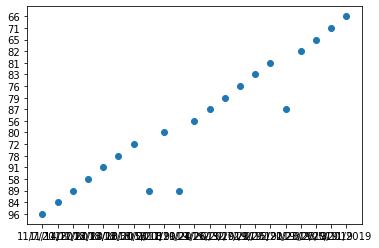

Wyoming


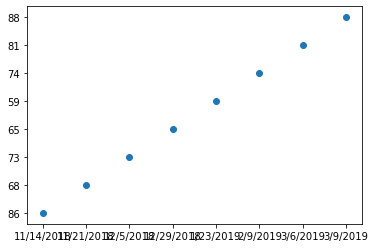

Xavier


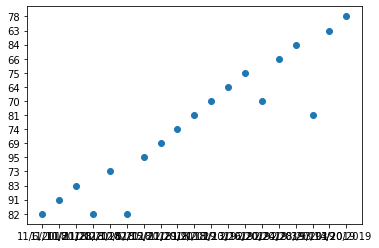

Yale


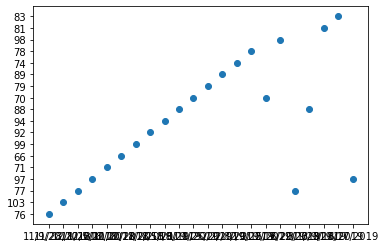

Youngstown State


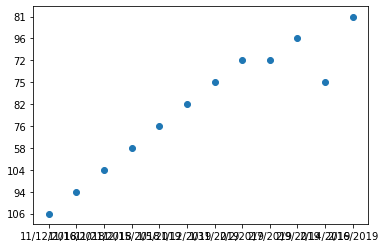

In [10]:
import sklearn
import matplotlib.pyplot as plot
import sklearn.linear_model as sckit

group = df.groupby(df.win_team)
sum = 0
for (x,y) in group:
    print(x)
    sum+= 1
    plot.scatter(y.date, y.win_score)
    #plot.plot()
    plot.show()